## Introduction to Tensorflow

### Tensorflow Basics

1.TF Basic Syntax \
2.TF Graphs \
3.TF Variables \
4.TF Placeholders

In [1]:
import tensorflow as tf
print(tf.__version__)

1.15.0


Tensor is Just a Fancy word of N Dimensional Array

In [2]:
hello = tf.constant("Hello ")
world = tf.constant("World")

In [3]:
type(hello) #These is a Tensor Object 

tensorflow.python.framework.ops.Tensor

In [4]:
print(hello)

Tensor("Const:0", shape=(), dtype=string)


In [5]:
# To Print Hello we need to run these inside a Session
with tf.Session() as sess:   #with - Automatically closes the session once block of code is executed
    result = sess.run(hello + world) 

In [6]:
print(result) #b respresents bytes literal

b'Hello World'


In [7]:
# We will also try addtion
a = tf.constant(10)
b = tf.constant(20)

type(a)

tensorflow.python.framework.ops.Tensor

In [8]:
a + b #You will not get the output - You need to run these inside a session

<tf.Tensor 'add_1:0' shape=() dtype=int32>

In [9]:
with tf.Session() as sess:
    result = sess.run(a+b)

In [10]:
print(result)

30


In [11]:
const = tf.constant(10)
fill_mat = tf.fill((4,4),10) 
fill_mat

<tf.Tensor 'Fill:0' shape=(4, 4) dtype=int32>

In [12]:
myzeros = tf.zeros((4,4))  # Tensor or ndarray with elements set to 0

In [13]:
myones = tf.ones((4,4))

In [14]:
myrandn = tf.add_nrandom_normal((4,4),mean=0,stddev = 1.0)

In [15]:
myrandu = tf.random_uniform((4,4),minval = 0,maxval=1)

In [16]:
my_ops = [const,fill_mat,myzeros,myones,myrandn,myrandu]

In [17]:
#We can use Interactice Session
sess = tf.InteractiveSession()

#Now rest of the cells will be called as you are executing -  with tf.Session() as sess:

In [18]:
for op in my_ops:
    print(sess.run(op)) #Instead of sess.run(op) - you can also write op.val
    print('\n')

10


[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


[[ 0.89284676  2.3945236  -0.21507755  0.22809415]
 [ 0.78802454  0.29111588  0.08790298 -0.13657601]
 [-0.18791787  2.5887072  -0.01814605  0.86429554]
 [ 0.5102834   0.3856326  -1.4145305  -0.36906108]]


[[0.32991064 0.5717     0.53629947 0.29625154]
 [0.6961372  0.8492203  0.15640211 0.6441988 ]
 [0.61591864 0.37401402 0.13195145 0.9395678 ]
 [0.01590729 0.3868184  0.10500526 0.9902581 ]]




In [21]:
a = tf.constant([ [1,2],
                  [3,4]
                ])
print(a)
a.eval()

Tensor("Const_7:0", shape=(2, 2), dtype=int32)


array([[1, 2],
       [3, 4]])

In [22]:
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [23]:
b = tf.constant([[10],[100]])

In [24]:
b.get_shape()

TensorShape([Dimension(2), Dimension(1)])

In [25]:
result = tf.matmul(a,b)
sess.run(result)

array([[210],
       [430]])

In [26]:
result.eval()

array([[210],
       [430]])

-------

## Tensorflow Graphs

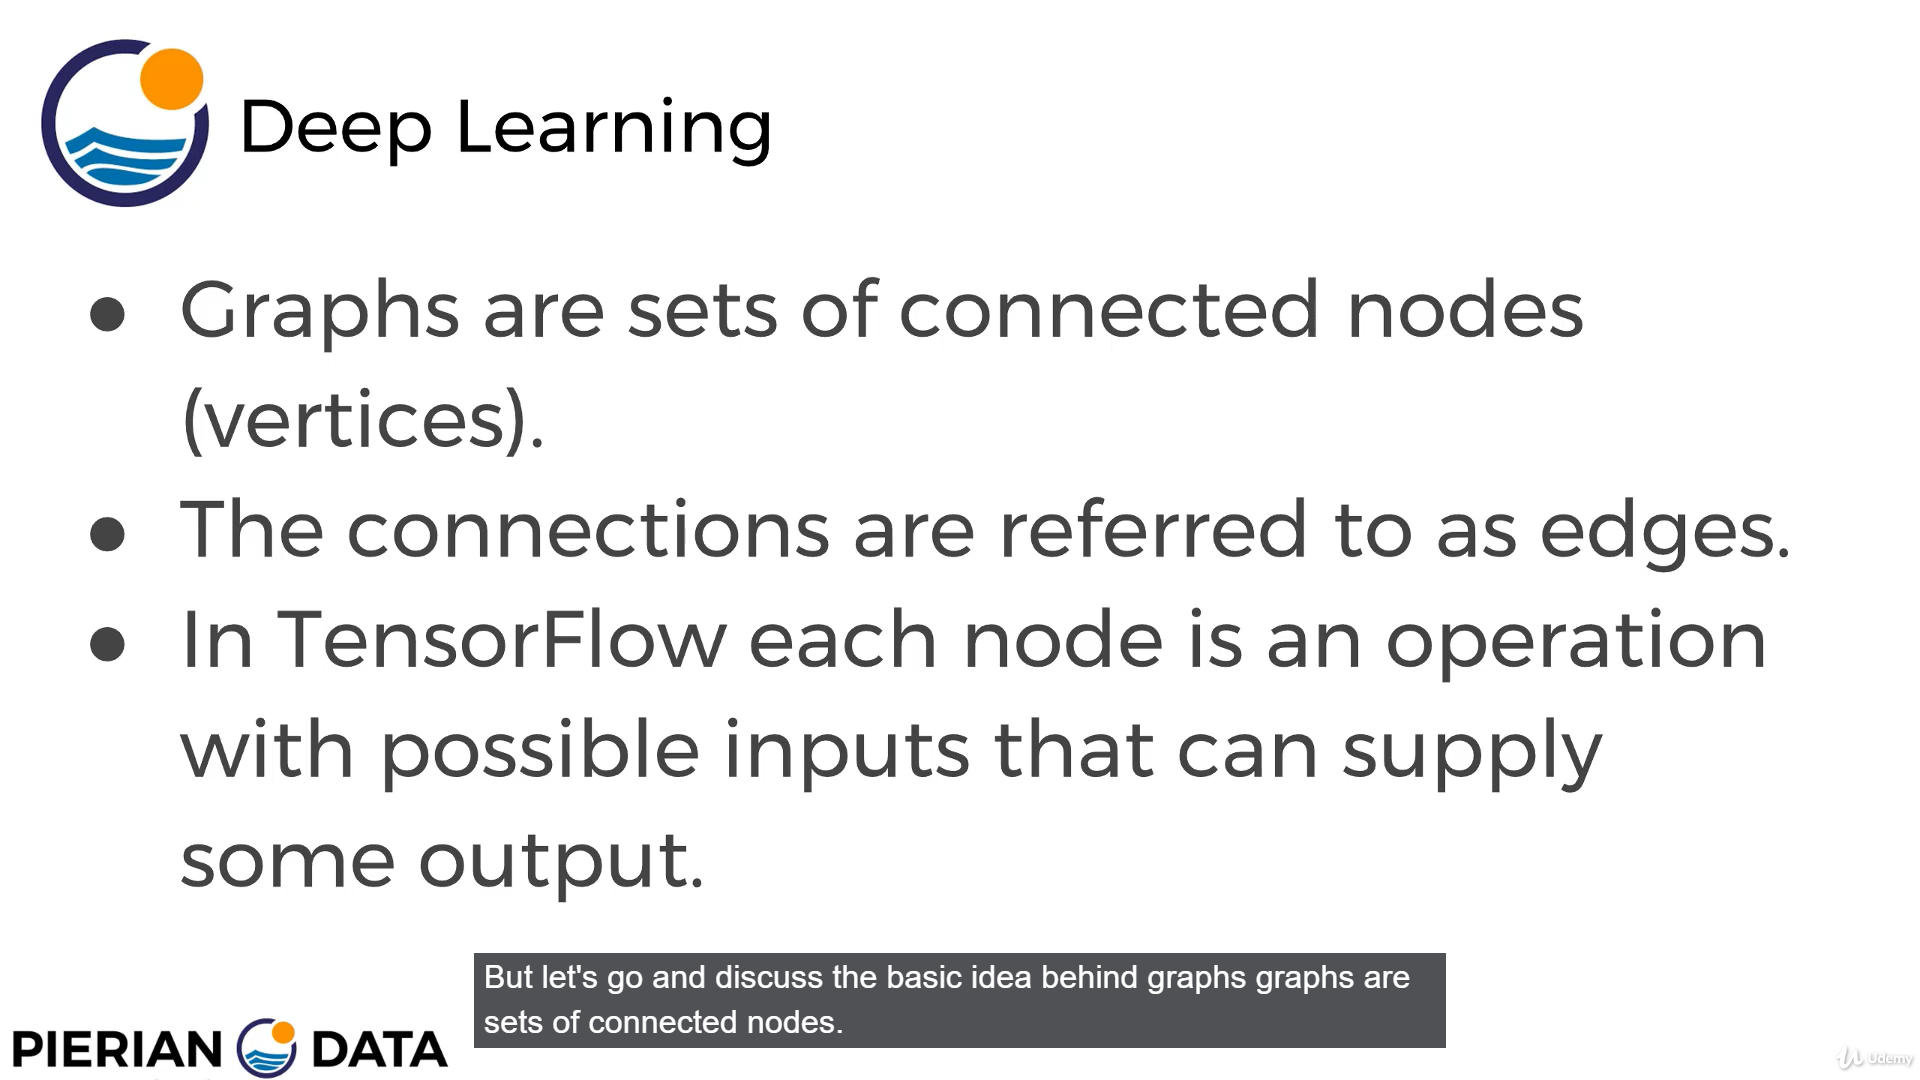

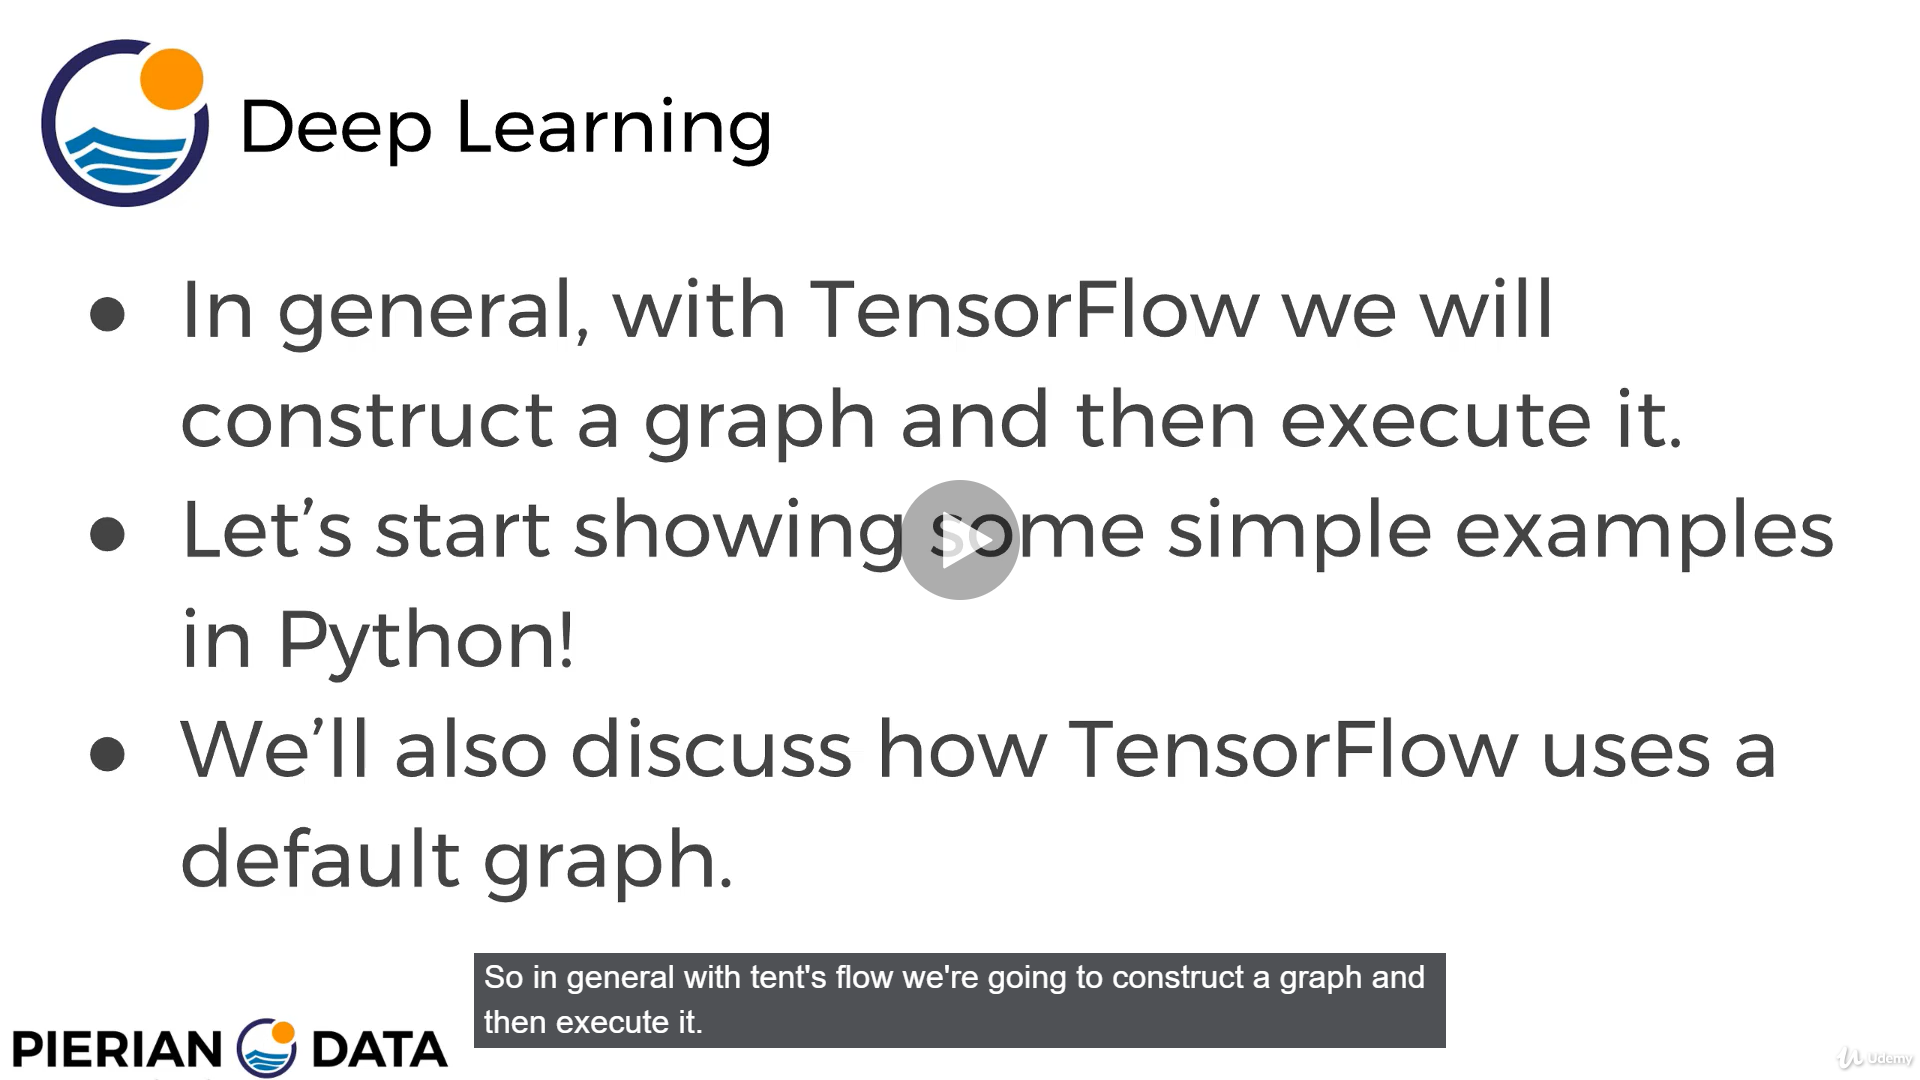

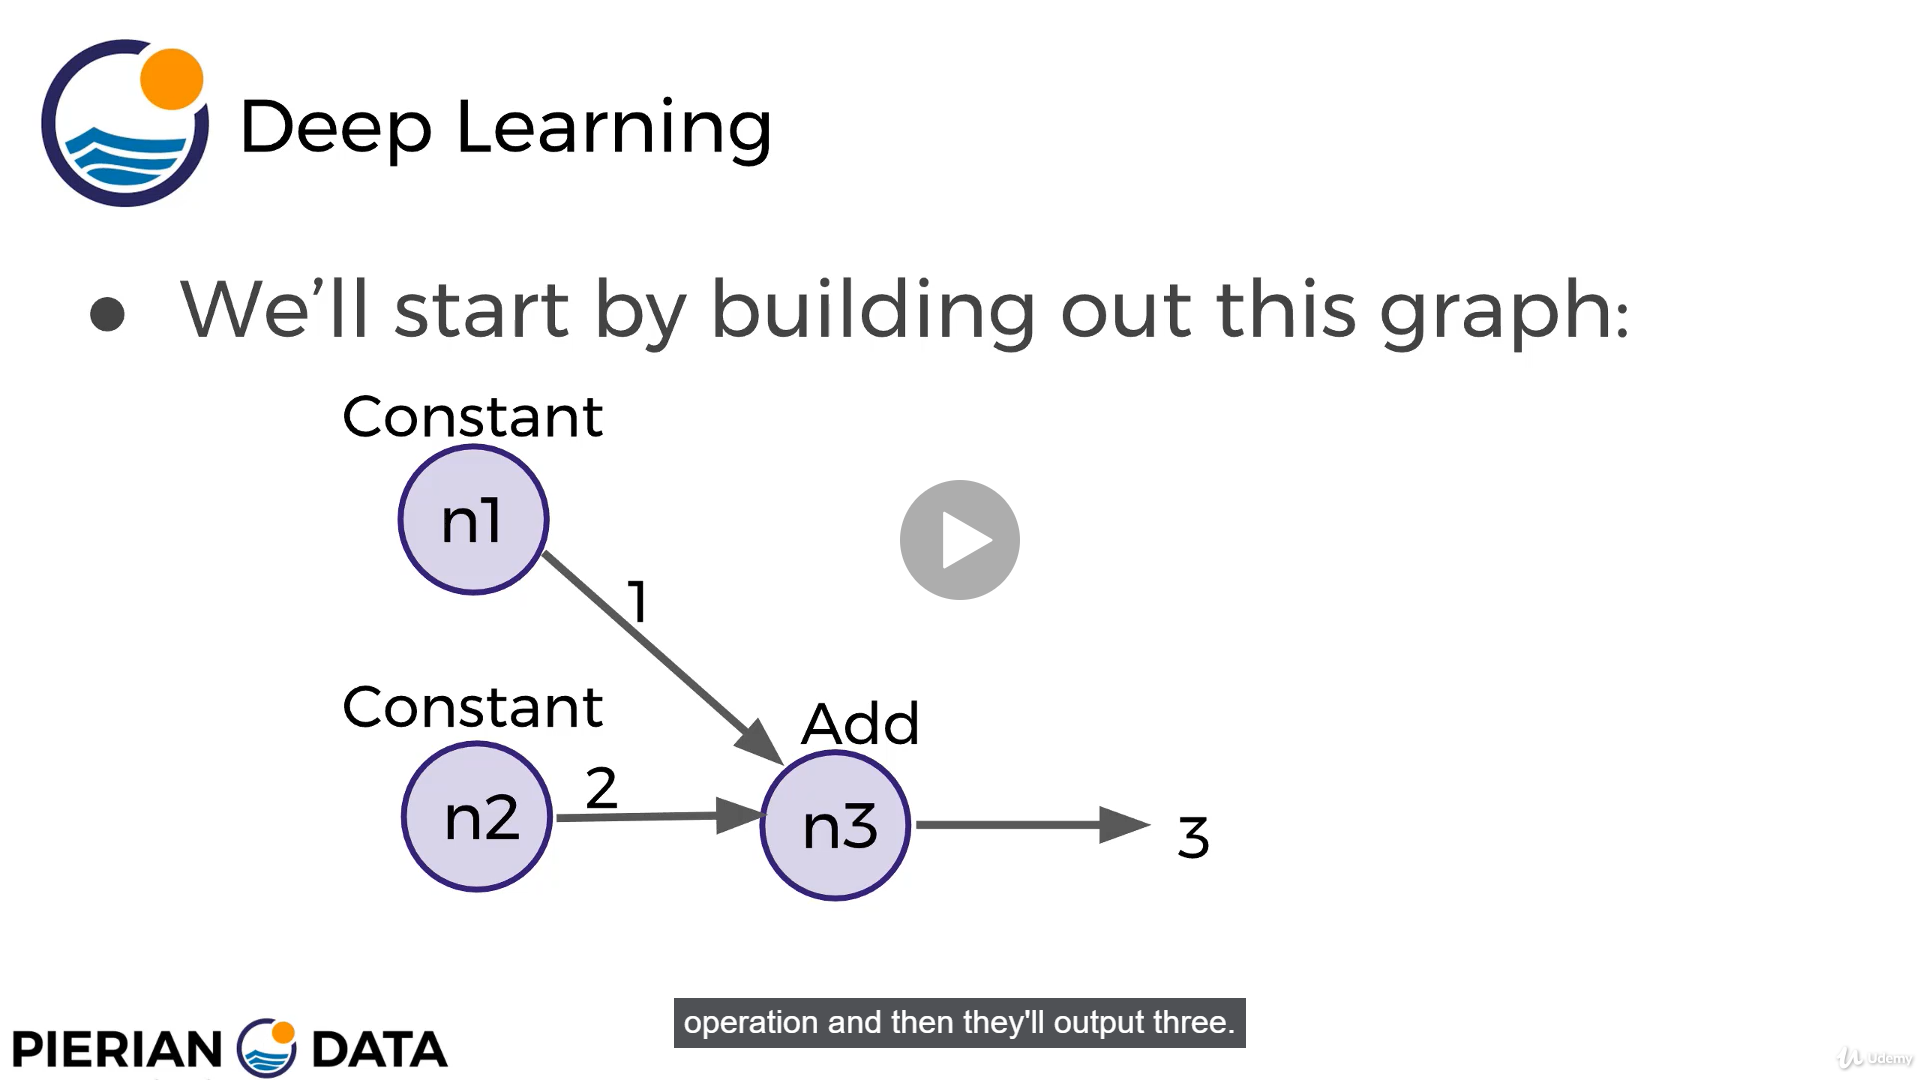

----

In [27]:
n1 = tf.constant(1)
n2 = tf.constant(2)
n3 = n1+n2 #Operation Node n3 

In [28]:
with tf.Session() as sess:
    result = sess.run(n3)

In [29]:
print(result)

3


In [30]:
print(n3) #Without running in session

Tensor("add_3:0", shape=(), dtype=int32)


When you start tensorflow a default graph is created and you can create additional graphs

In [31]:
print(tf.get_default_graph())

In [32]:
g = tf.Graph()

In [33]:
print(g)

In [34]:
#Now we want to set this new graph as default graph
graph_one = tf.get_default_graph()
graph_one

In [35]:
graph_two = tf.Graph()
graph_two

In [36]:
#Set graph_two as default graph
with graph_two.as_default():
    print(graph_two is tf.get_default_graph())

True


In [37]:
#Now when we run it at outside that with - False
print(graph_two is tf.get_default_graph())

False


---

### Variables and Place Holders

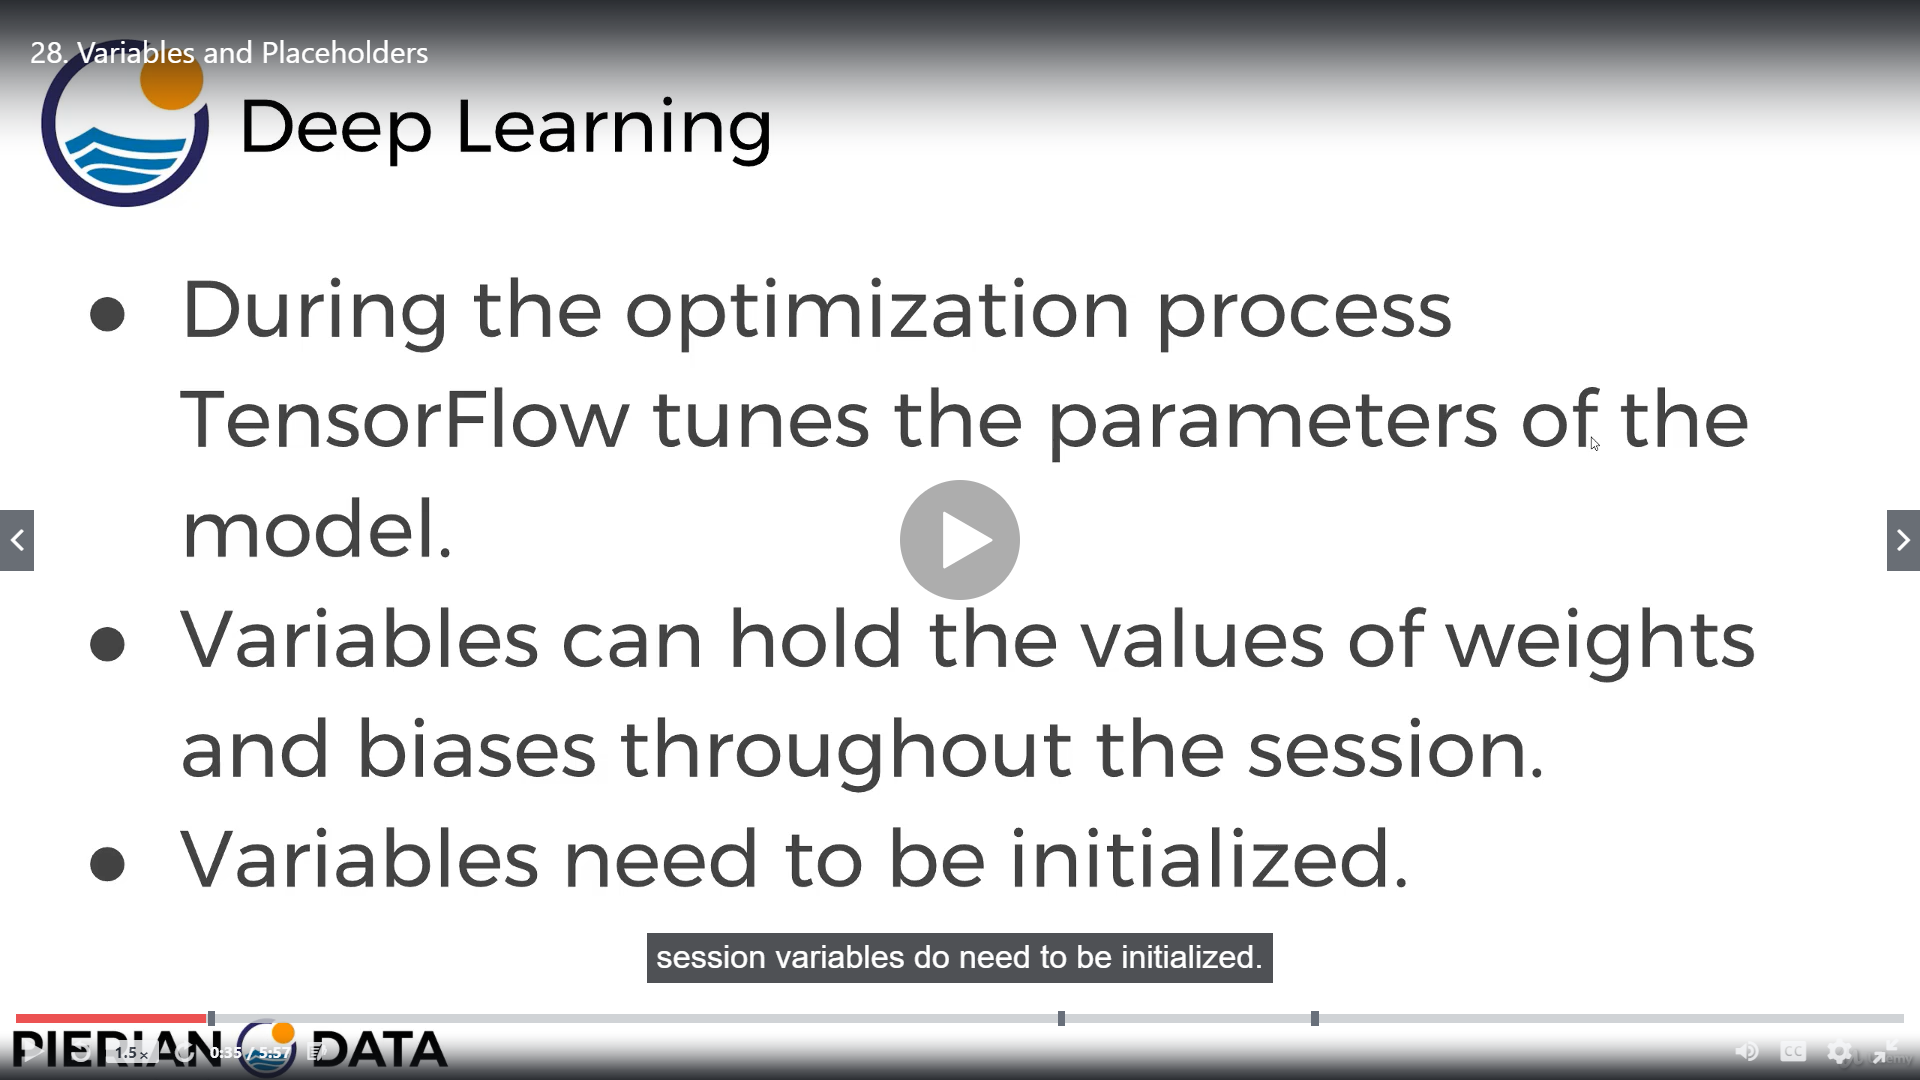

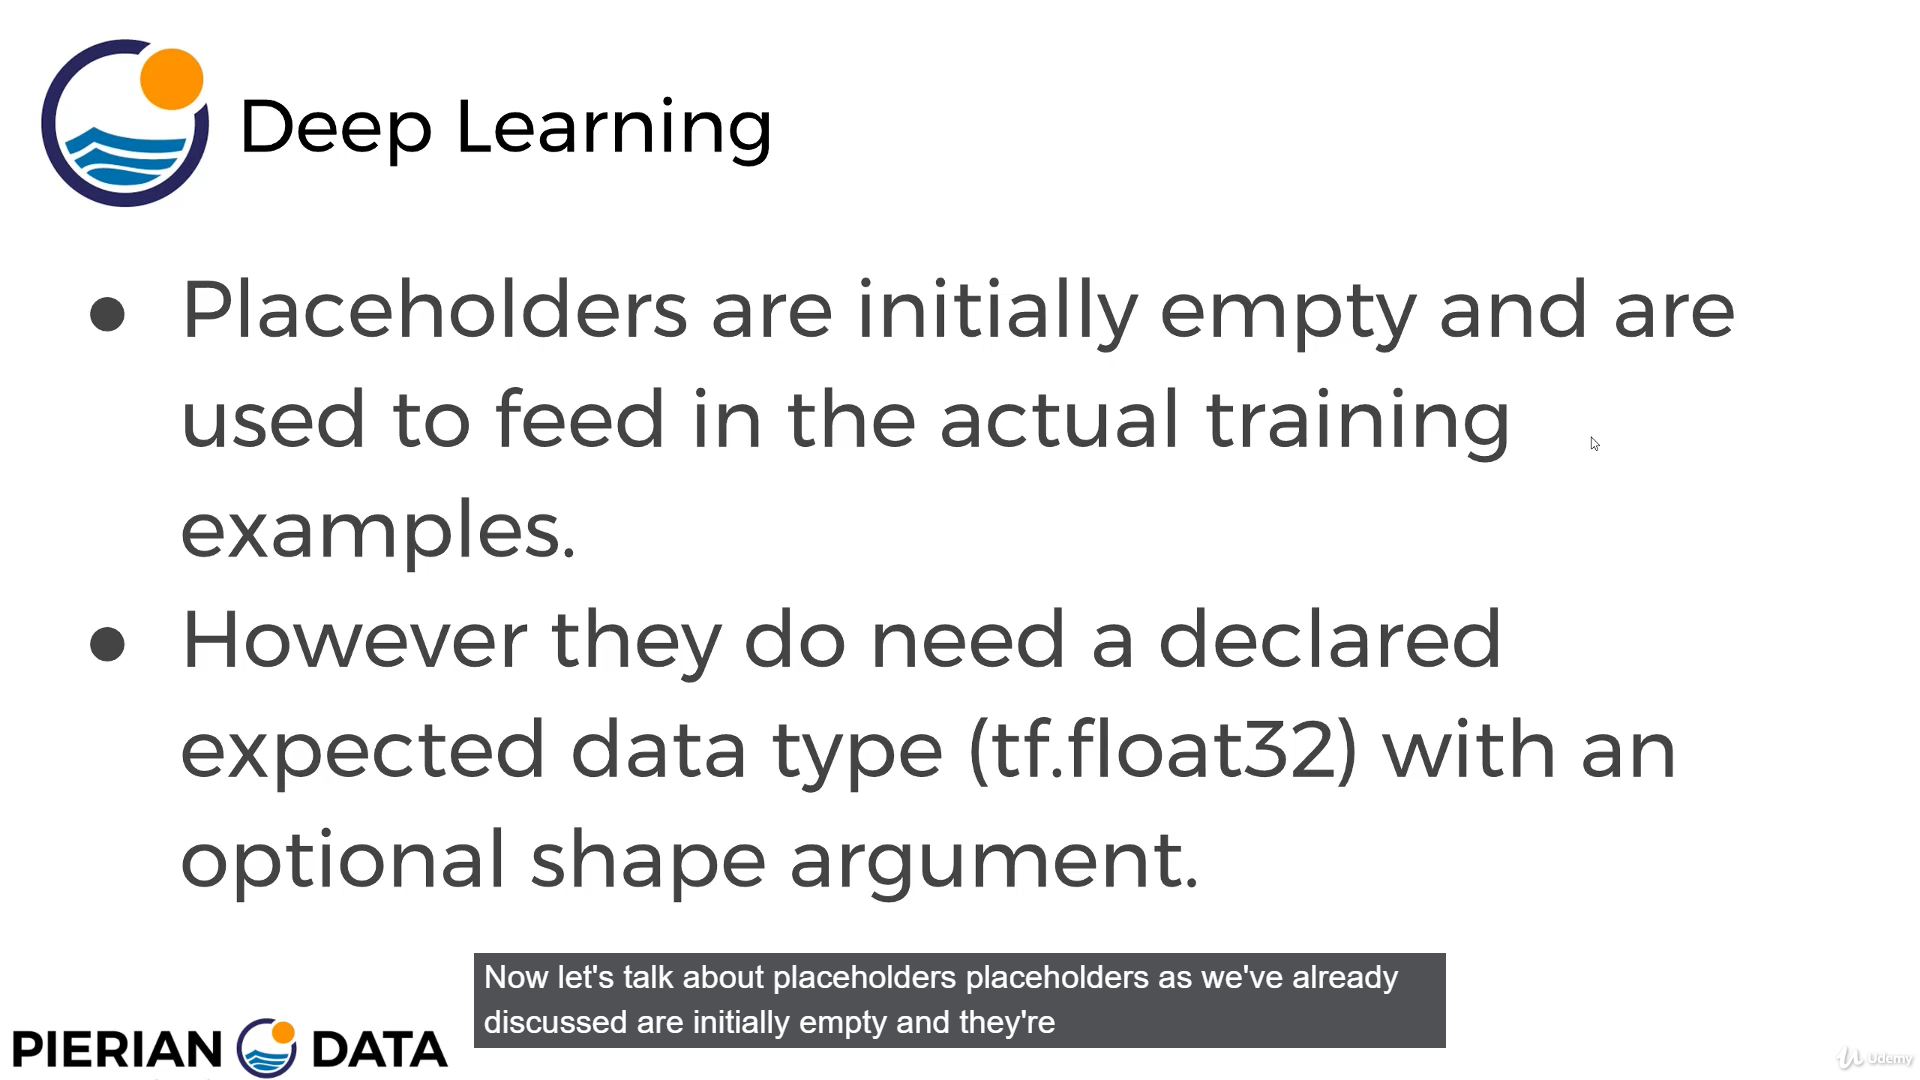

In [39]:
sess.close()

In [40]:
sess = tf.InteractiveSession()

In [41]:
my_tensor = tf.random_uniform((4,4),0,1)

In [42]:
my_tensor

<tf.Tensor 'random_uniform_1:0' shape=(4, 4) dtype=float32>

In [43]:
my_var = tf.Variable(initial_value=my_tensor)

In [44]:
print(my_var)

<tf.Variable 'Variable:0' shape=(4, 4) dtype=float32_ref>


In [45]:
sess.run(my_var) #You will get error , Because we need to initialize our varaible - It is neccessary to run Initialize code

FailedPreconditionError: 2 root error(s) found.
  (0) Failed precondition: Attempting to use uninitialized value Variable
	 [[node Variable (defined at C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1748) ]]
	 [[Variable/_1]]
  (1) Failed precondition: Attempting to use uninitialized value Variable
	 [[node Variable (defined at C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1748) ]]
0 successful operations.
0 derived errors ignored.

Original stack trace for 'Variable':
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\asyncio\base_events.py", line 539, in run_forever
    self._run_once()
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\asyncio\base_events.py", line 1775, in _run_once
    handle._run()
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 138, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 456, in _handle_events
    self._handle_recv()
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 486, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 438, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2854, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2880, in _run_cell
    return runner(coro)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3057, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3248, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-43-4e22ea9c99a4>", line 1, in <module>
    my_var = tf.Variable(initial_value=my_tensor)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\tensorflow_core\python\ops\variables.py", line 258, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\tensorflow_core\python\ops\variables.py", line 219, in _variable_v1_call
    shape=shape)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\tensorflow_core\python\ops\variables.py", line 197, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\tensorflow_core\python\ops\variable_scope.py", line 2519, in default_variable_creator
    shape=shape)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\tensorflow_core\python\ops\variables.py", line 262, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\tensorflow_core\python\ops\variables.py", line 1688, in __init__
    shape=shape)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\tensorflow_core\python\ops\variables.py", line 1846, in _init_from_args
    shape, self._initial_value.dtype.base_dtype, name=name)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\tensorflow_core\python\ops\state_ops.py", line 79, in variable_op_v2
    shared_name=shared_name)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\tensorflow_core\python\ops\gen_state_ops.py", line 1621, in variable_v2
    shared_name=shared_name, name=name)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\tensorflow_core\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


In [46]:
init = tf.global_variables_initializer()

In [47]:
sess.run(init) #You need to run these init first then run your varaibles

In [48]:
sess.run(my_tensor)

array([[0.79889846, 0.08088684, 0.33100903, 0.87996805],
       [0.24146831, 0.9800799 , 0.4856255 , 0.14611554],
       [0.786464  , 0.2716161 , 0.598897  , 0.8662473 ],
       [0.99681354, 0.7854526 , 0.8559971 , 0.14767623]], dtype=float32)

### Placeholder

In [49]:
ph = tf.placeholder(tf.float32)

In [50]:
ph1 = tf.placeholder(tf.float32,shape=(None,5)) #None - Will be replace to Samples in data

----

## Tensorflow Neural Network - Part 1

We will create a neuron that performs very simple linear fit to some 2D data
Steps :
1.Build Graph
2.Initiate Session
3.Feed Data In and get Output

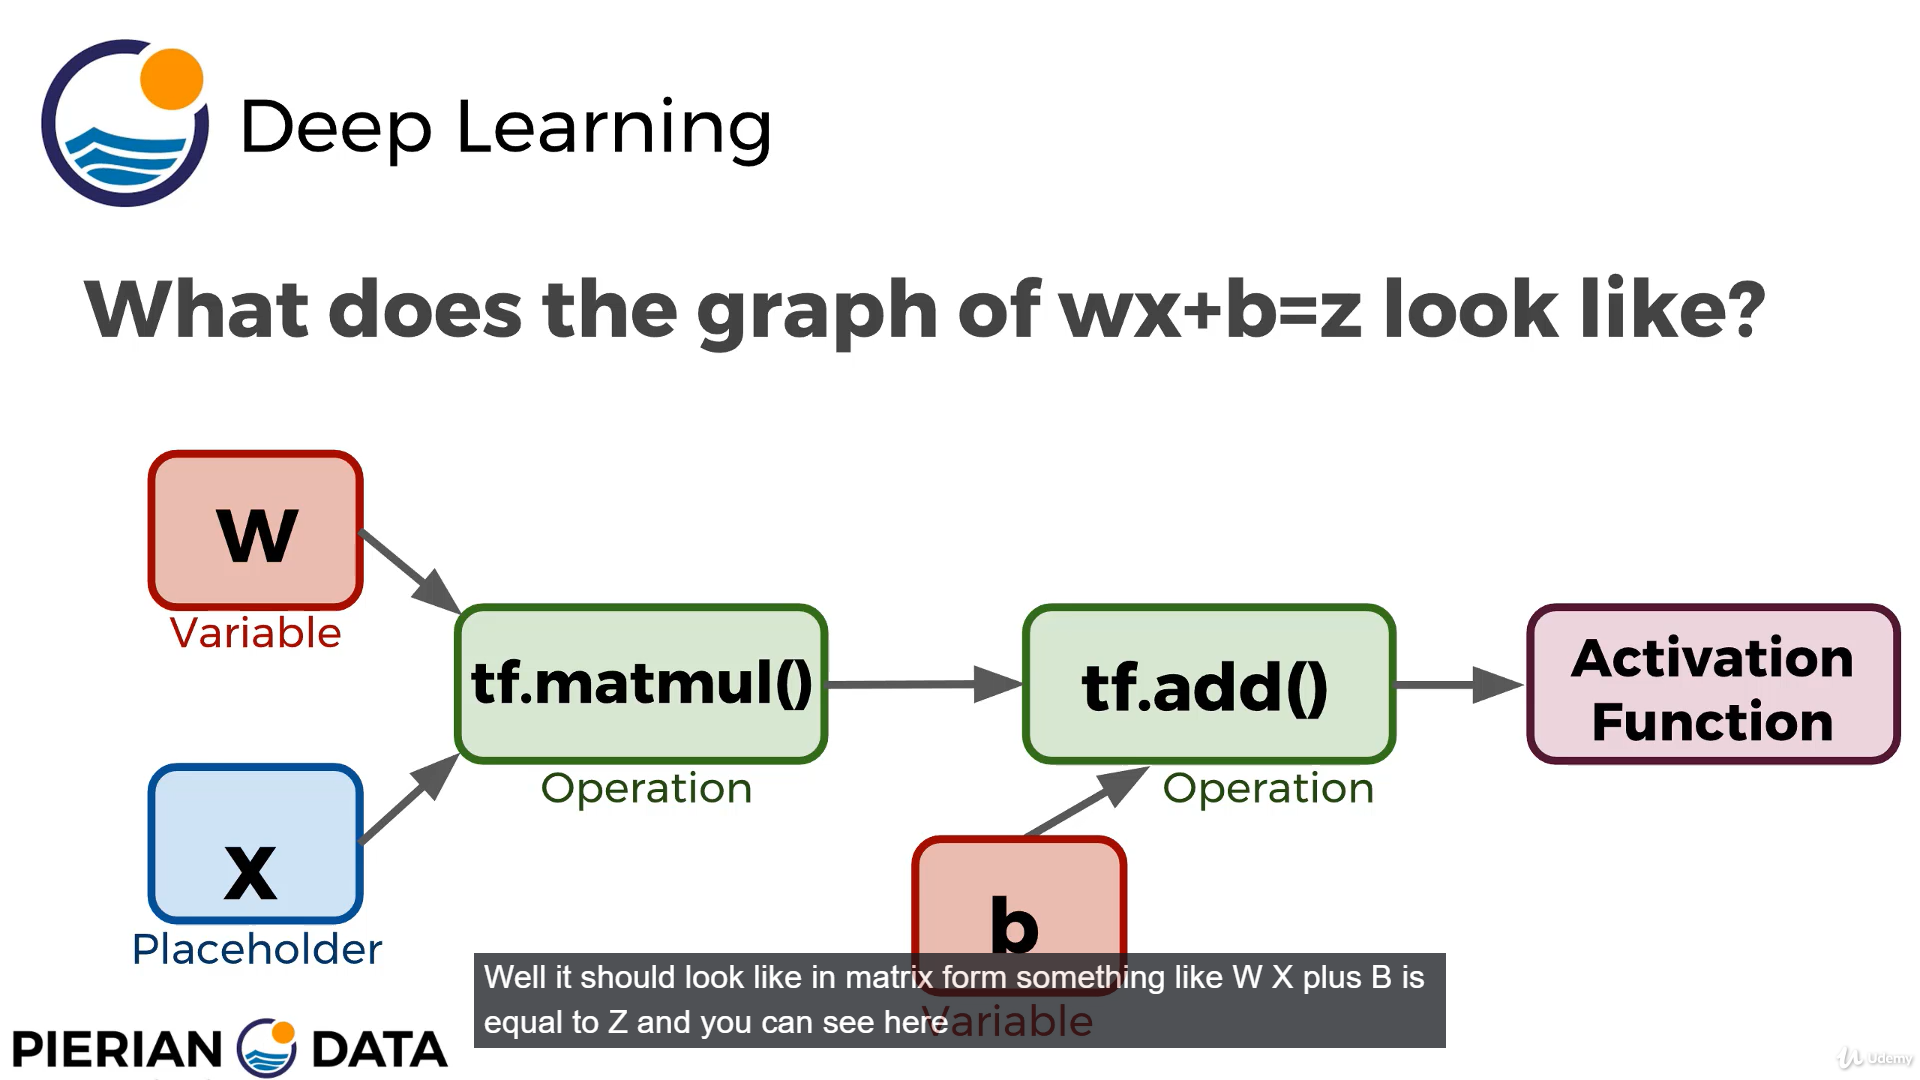

Afterwards we can add Cost Function in order to train your network to optimize the parameters

In [51]:
sess.close

<bound method InteractiveSession.close of <tensorflow.python.client.session.InteractiveSession object at 0x00000145088F2128>>

In [52]:
sess.close()

In [53]:
import numpy as np
np.random.seed(101)
tf.set_random_seed(101)

In [54]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [55]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [56]:
#PlaceHolders
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [57]:
#Operations
add_op = a + b
mul_op = a * b

In [58]:
#Sessions
with tf.Session() as sess:
    
    # a and b are placeholder object they need data
    add_result = sess.run(add_op,feed_dict={a:10,b:20})
    print(add_result)

30.0


In [59]:
with tf.Session() as sess:
    
    # a and b are placeholder object they need data
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


In [60]:
with tf.Session() as sess:
    
    # a and b are placeholder object they need data
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    print('\n')
    mul_result = sess.run(mul_op,feed_dict={a:rand_a,b:rand_b})
    print(mul_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


## Tensorflow Neural Network - Part 2

### Example of Neural Network 

In [61]:
# Constant Varaible Names
n_features = 10
n_dense_neurons = 3 #1 layer of 3 dense neurons

In [62]:
# Placeholders
x = tf.placeholder(tf.float32,shape=(None,n_features)) #We dont how much rows will be provided , But we know no of columns

In [63]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons])) #Weights

b = tf.Variable(tf.ones([n_dense_neurons])) # W will be multiplied by x but in these we are just adding

In [65]:
#Operations and Activation Function
xW = tf.matmul(x,W)
z = tf.add(xW,b)

a = tf.sigmoid(z)

In [67]:
# Now our Neural Network also has Variables .So we need to first Run our tf_global_varaibles_initializer
init = tf.global_variables_initializer()

with tf.Session() as sess:
    
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [68]:
print(layer_out)

[[0.85899407 0.926714   0.45346332]]


Till Now we are not adjusting values of W and b. \ 
We basically choose random values of W and b.And run it them and see what happens out. \
That is not how we run a neural network.We need to go back and adjust W and b based on some sort of Cost function. \
So we need Cost Function and Optimizer to adjust W and b

## Simple Linear Regression Example

In [69]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10) #10 Linearly spaced points between 0 and 10 and then add little bit noise to it

In [70]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [71]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_label

array([0.5420333 , 1.17575569, 0.85241231, 2.50514314, 4.67005971,
       4.41685654, 6.66701681, 6.69180648, 7.54731409, 9.03483077])

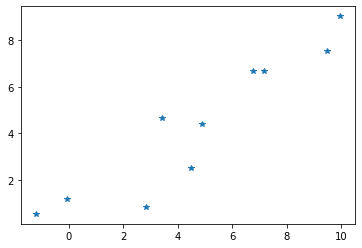

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_data,y_label,'*')

### Now we will start our Neural Network with Graphs

y = mx + b

In [75]:
np.random.rand(2)
#These will give me 2 random values and Im going to initialize M and B to be random values

array([0.44236813, 0.87758732])

In [76]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

#It is upto neural network with cost function and optimizer to fix these values to create Fitted Line in Above Figure

In [77]:
# Cost Function
error = 0

for x,y in zip(x_data,y_label): #These will make List of Tuples of each point in X and corresponding y label
    
    y_hat = m*x + b
    #Now y_hat will be totally random because we have random values in m and b
    
    #Cost Function
    error += (y-y_hat)**2
    
    #Now in order to minimize this we need to use some sort of optimizer 

In [78]:
#Optimizer to minimize the cost function

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [79]:
# Run it in Session by first running init

init = tf.global_variables_initializer()

In [80]:
with tf.Session() as sess:
    sess.run(init)
    
    training_steps = 1
    
    for i in range(training_steps):
        
        sess.run(train)
    
    #These will give us final weights after the network has learned 
    final_slope , final_intercept = sess.run([m,b])

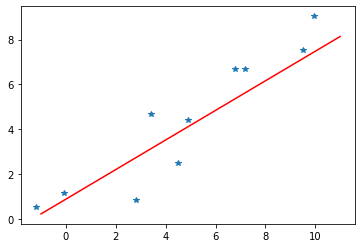

In [81]:
x_test = np.linspace(-1,11,10)

#y = mx +b
y_pred_plot = final_slope * x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')

In [82]:
# Now we will do these for 100 training steps
with tf.Session() as sess:
    sess.run(init)
    
    training_steps = 100
    
    for i in range(training_steps):
        
        sess.run(train)
    
    #These will give us final weights after the network has learned 
    final_slope , final_intercept = sess.run([m,b])

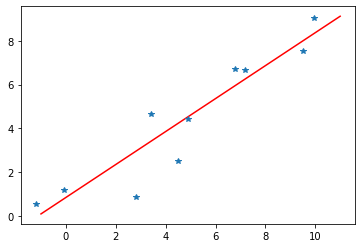

In [83]:
x_test = np.linspace(-1,11,10)

#y = mx +b
y_pred_plot = final_slope * x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')

----

## Tensorflow Regression Example - Part 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
#Dataset
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.randn(len(x_data))
print(x_data)
print('\n')
print(noise)

[0.000000e+00 1.000001e-05 2.000002e-05 ... 9.999980e+00 9.999990e+00
 1.000000e+01]


[ 1.87075392 -1.01748648 -0.4538662  ...  0.18139723 -1.160871
 -0.82472978]


y = mx + b \
b = 5

In [3]:
#Now m = 0.5 which we will discover from our model
y_true = (0.5 * x_data) + 5 + noise

In [7]:
# Using Pandas
x_df = pd.DataFrame(data=x_data,columns = ['X Data'])
x_df.head()

X Data
0  0.00000
1  0.00001
2  0.00002
3  0.00003
4  0.00004

In [8]:
y_df = pd.DataFrame(data = y_true,columns=['Y'])
y_df.head()

Y
0  6.870754
1  3.982519
2  4.546144
3  6.980582
4  4.212941

In [9]:
my_data = pd.concat([x_df,y_df],axis=1)
my_data.head()

X Data         Y
0  0.00000  6.870754
1  0.00001  3.982519
2  0.00002  4.546144
3  0.00003  6.980582
4  0.00004  4.212941

In [11]:
# Plotting sample of my_data
my_data.sample(n=250).head()

X Data         Y
635800  6.358006  6.784782
877646  8.776469  9.911813
803517  8.035178  9.471129
284489  2.844893  5.082467
575724  5.757246  8.061628

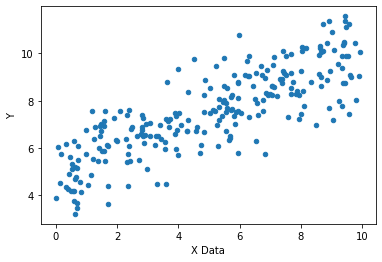

In [14]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y');

Now we want tensorflow to fit a Line in above plot. \
Now we cant feed in 1000000 points at a time in Neural network.So it is neccesary for you to create batches of data


In [15]:
batch_size = 8 #We will grab 8 points from 1000000 at a time

In [29]:
# Now we take random values for m and b
np.random.randn(2)

array([0.80396029, 1.22133395])

In [17]:
# Create m and b variables
m = tf.Variable(0.81)
b = tf.Variable(0.87)

In [30]:
#Placeholders for x and y
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [31]:
# Graph - Operations that we will perform
y_model = m * xph + b

#Cost Function
error = tf.reduce_sum(tf.square(yph - y_model))

#Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [32]:
# Init Global Variables
init = tf.global_variables_initializer()

In [33]:
rand_indtest = np.random.randint(len(x_data),size = batch_size)
rand_indtest

array([396712, 719424, 758756, 395672, 164960, 973728, 224381, 638525])

In [34]:
#Session
with tf.Session() as sess:
    
    sess.run(init)
    batches =1000
    
    #We will feed in 1000 batches of Data where each batch has 8 Corresponding data 
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size = batch_size)
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
    
    #We will grab final value of m and b
    model_m , model_b = sess.run([m,b]) 

In [35]:
#We know that true slope should be close to 0.5 - We Initiall started with 0.81 and b - 0.87
print(model_m) #m - 0.5
print(model_b) #b - 5

0.4857926
4.875115


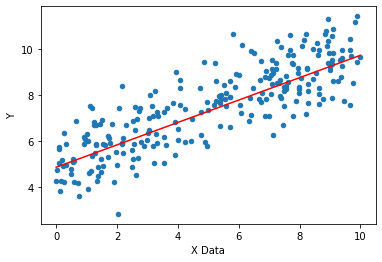

In [37]:
#Visualize Results
y_hat = x_data*model_m + model_b

my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

  -----

## Tensorflow Estimator API - Regression Task

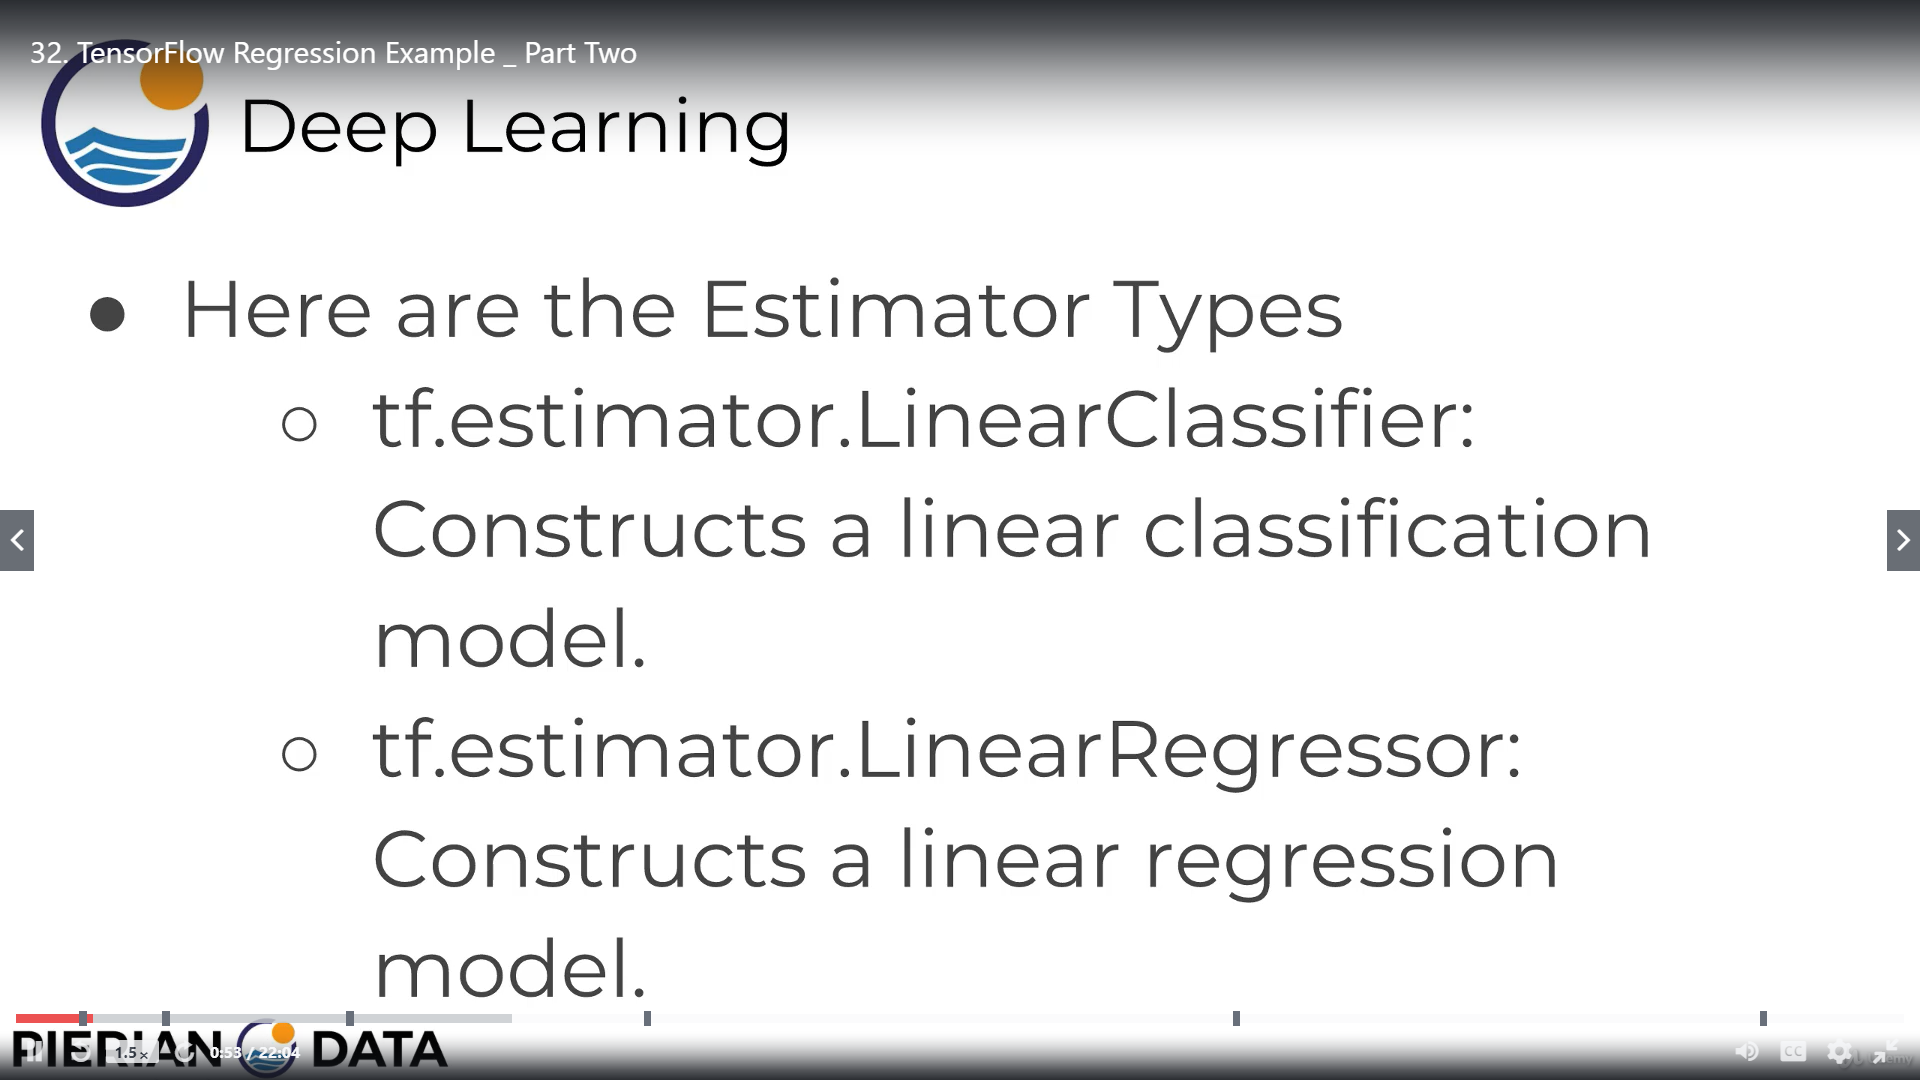

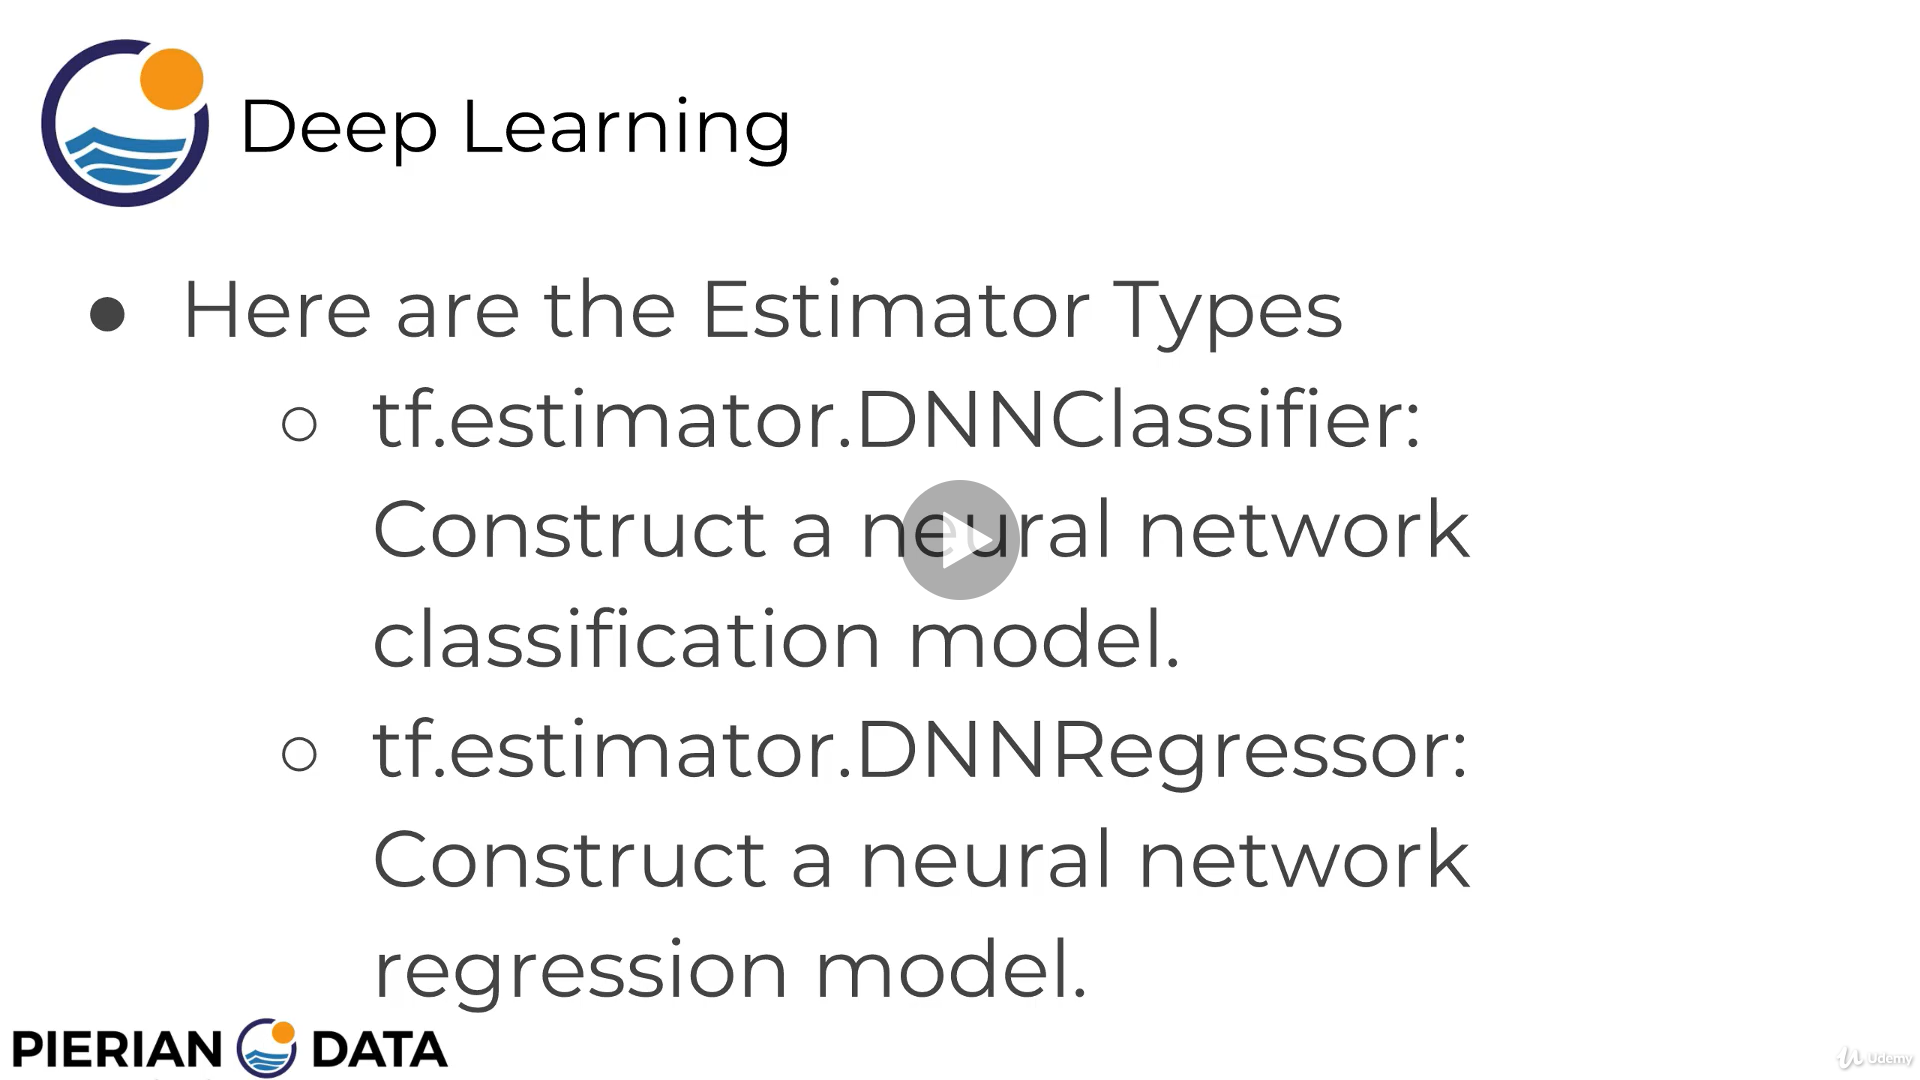

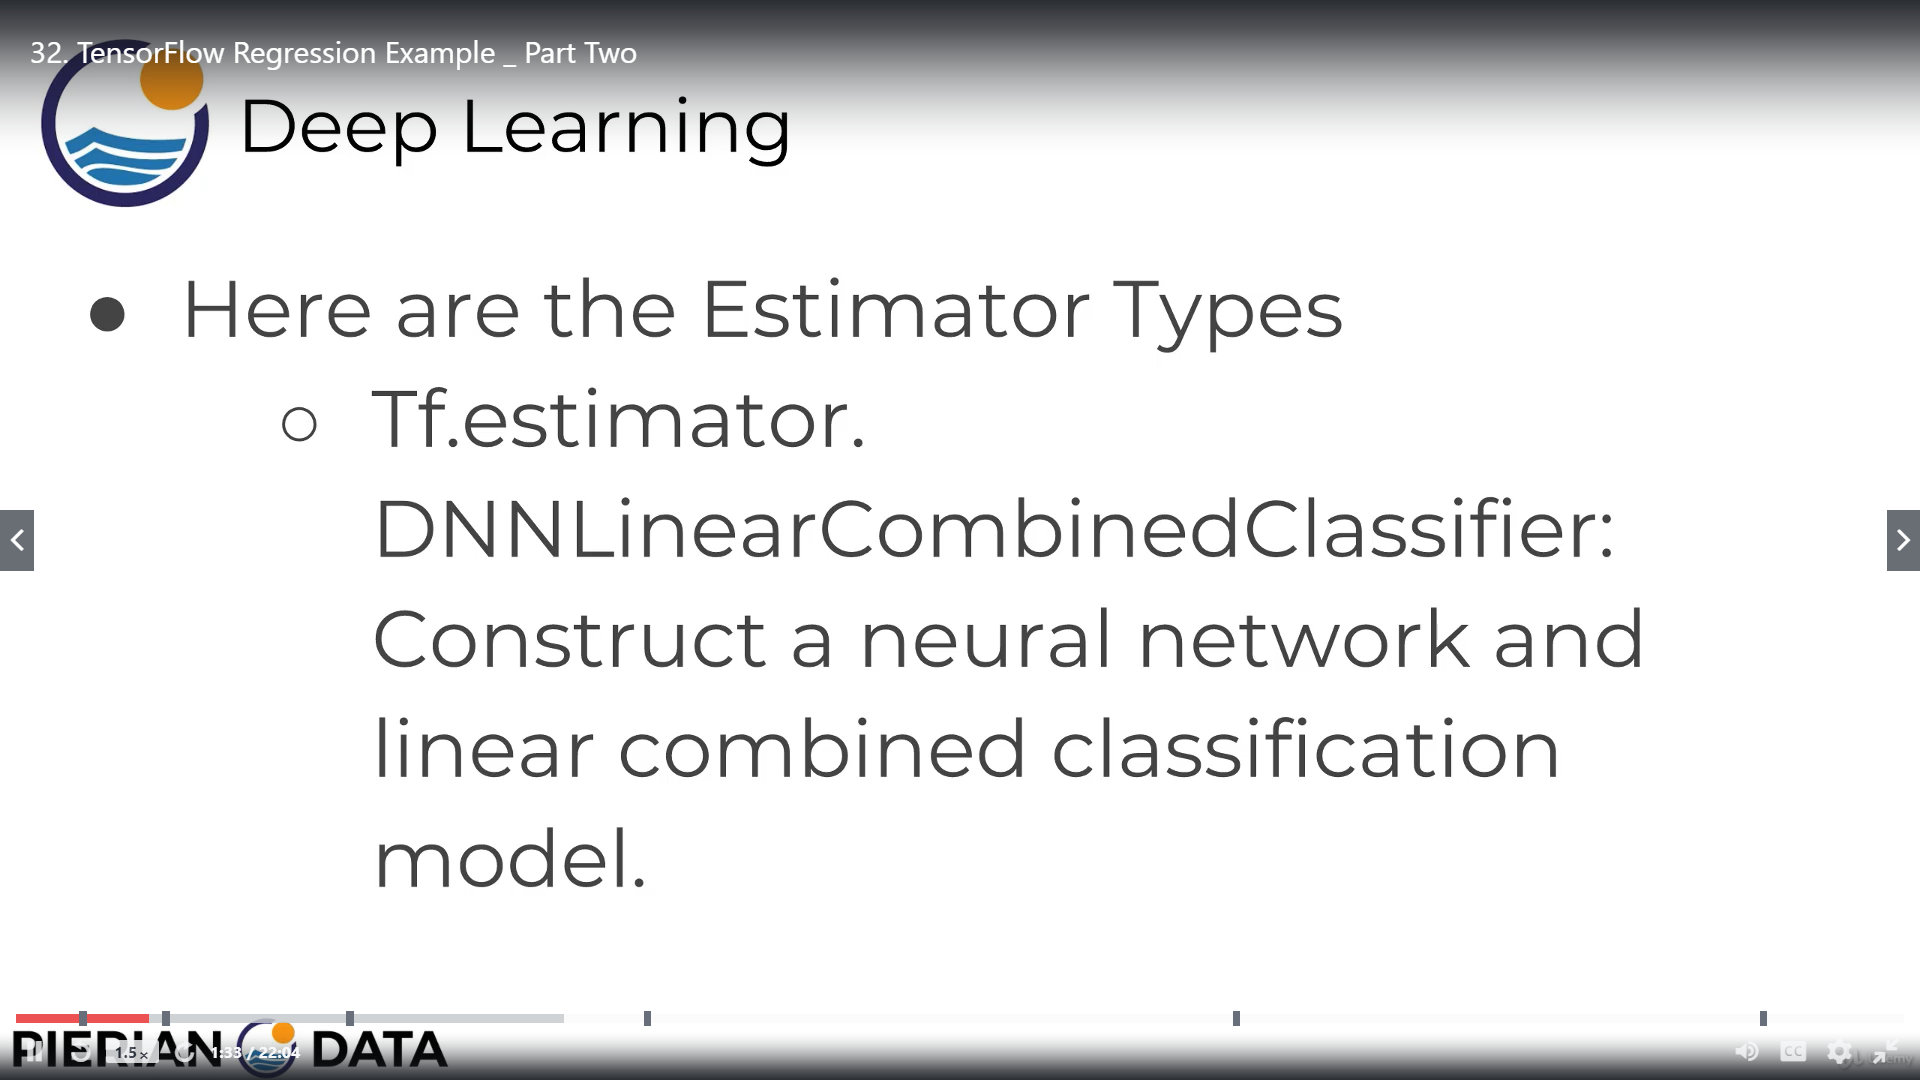

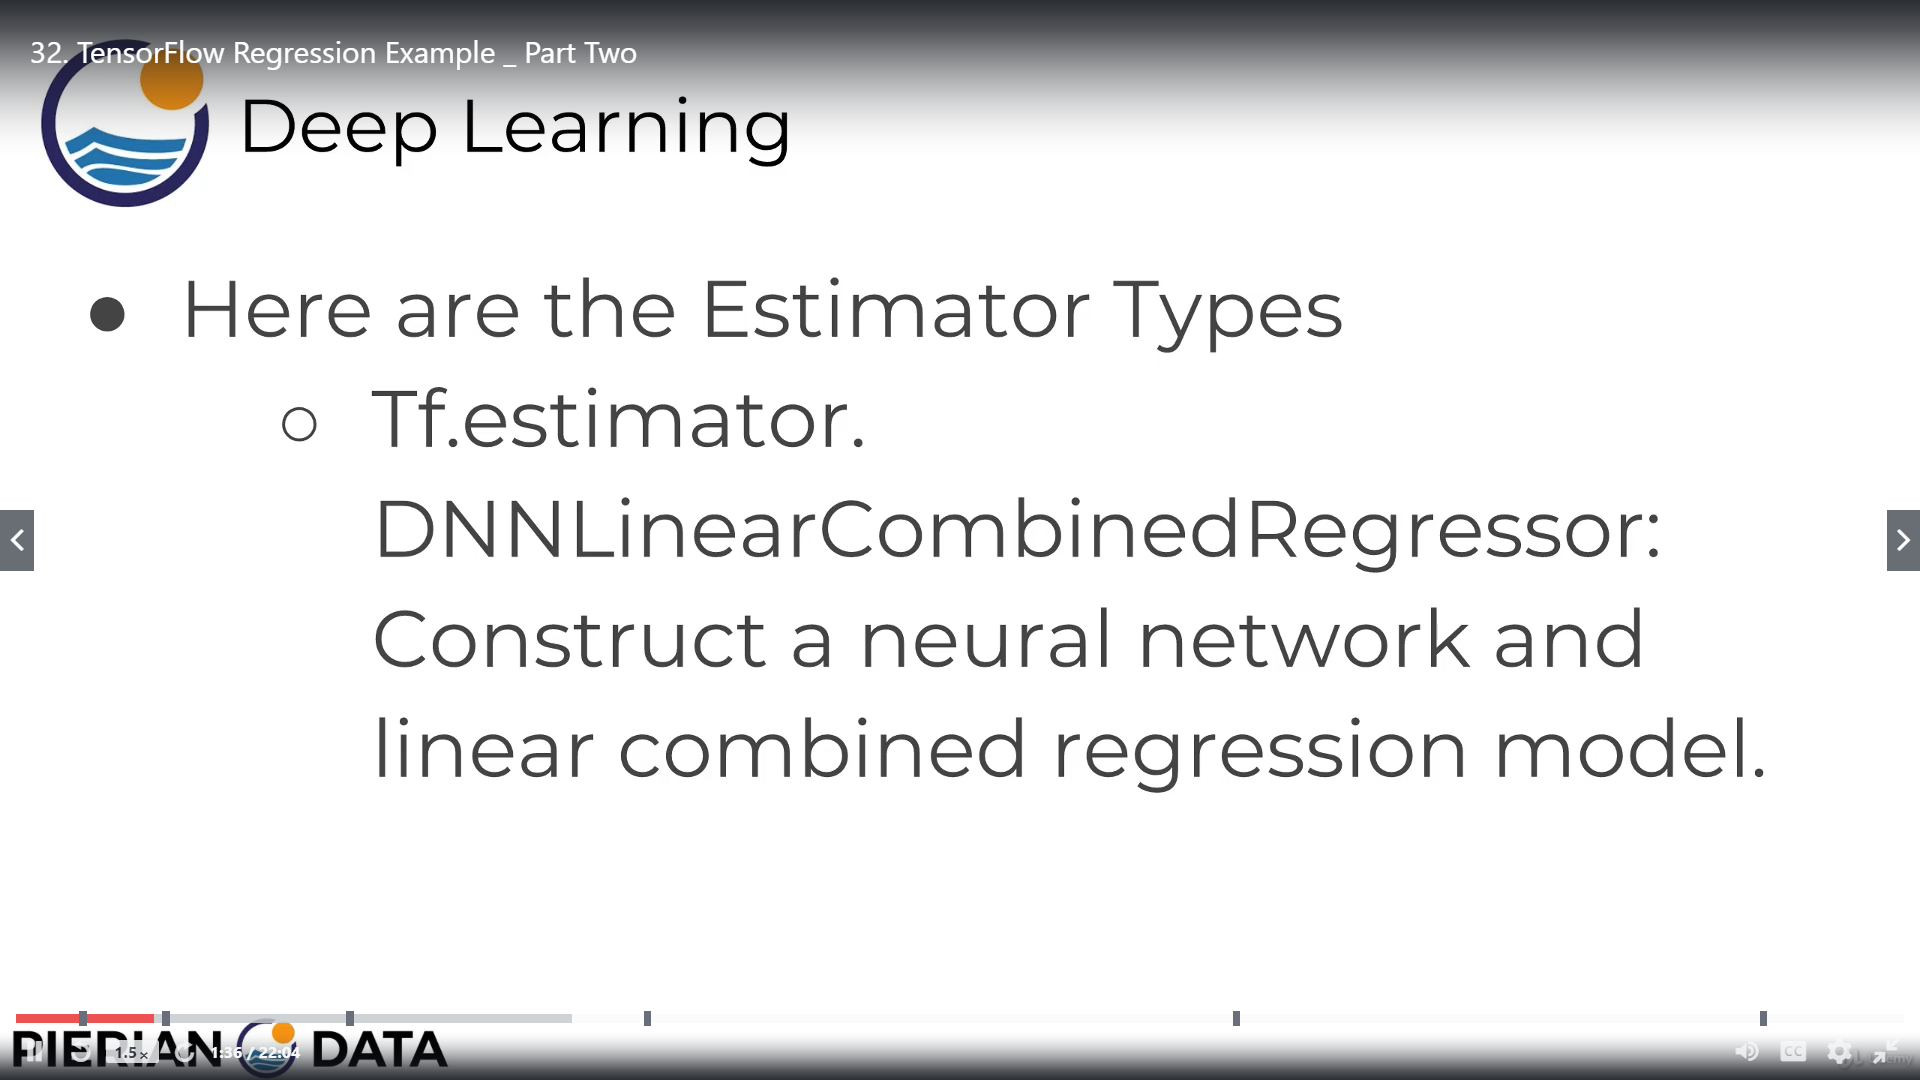

# Steps for using Estimator API

1.Define List of Feature Columns \
2.Create Estimator Model \
3.Create Data Input Function (Takes data as numpy array) \
4.Call train,evaluate and predict methods on estimator object

In [38]:
# Step 1 - Features Column list for Estimator
feat_cols = [ tf.feature_column.numeric_column('x',shape=[1]) ] #Shape we have only 1 Dimension

In [39]:
# Step 2 - Create Estimator Model
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\LUCKY_~1\\AppData\\Local\\Temp\\tmpfczr2zsc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001479EE532B0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [41]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [42]:
# Train Test split from sklearn
from sklearn.model_selection import train_test_split
x_train,x_eval,y_train,y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

print(x_train.shape)
print(x_eval.shape)
print(y_train.shape)
print(y_eval.shape)

(700000,)
(300000,)
(700000,)
(300000,)


In [43]:
# Step 3 - Create Data Input Function - It acts like your Feed Dictionary,Batch Size
#We will pass same feature column name that we wrote in step 1
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,
                                                batch_size = 8,
                                                num_epochs=None,
                                                shuffle=True)

#Train input Function
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,
                                                batch_size = 8,
                                                num_epochs=1000,
                                                shuffle=False) #Using Train input function for evaluation against a test input function

#Train input Function
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,
                                                batch_size = 8,
                                                num_epochs=1000,
                                                shuffle=False)  

In [44]:
# Step 4

#Train Estimator

estimator.train(input_fn=input_func,steps=1000) #We didnt specified Epochs for input_func above,we will specify here

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\LUCKY_~1\A

In [45]:
# Evaluation Metrics

train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-19T14:07:06Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\LUCKY_~1\AppData\Local\Temp\tmpfczr2zsc\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-08-19-14:07:36
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.061466, global_step = 1000, label/mean = 7.513248, loss = 8.491728, prediction/mean = 7.33972
INFO:tensorflow:Saving 'checkpoint_path

In [46]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-19T14:08:39Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\LUCKY_~1\AppData\Local\Temp\tmpfczr2zsc\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-08-19-14:08:47
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1022389, global_step = 1000, label/mean = 7.480234, loss = 8.817911, prediction/mean = 7.3190165
INFO:tensorflow:Saving 'checkpoint_p

In [48]:
print('Training Data Metrics')
print(train_metrics)

Training Data Metrics
{'average_loss': 1.061466, 'label/mean': 7.513248, 'loss': 8.491728, 'prediction/mean': 7.33972, 'global_step': 1000}


In [49]:
print('Evaluation Metrics')
print(eval_metrics)

Evaluation Metrics
{'average_loss': 1.1022389, 'label/mean': 7.480234, 'loss': 8.817911, 'prediction/mean': 7.3190165, 'global_step': 1000}


In [50]:
# prediction of new values
brand_new_data = np.linspace(0,10,10)

input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

estimator.predict(input_fn=input_fn_predict)

<generator object Estimator.predict at 0x00000147A0F66570>

In [51]:
#Convert Generator to list
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\LUCKY_~1\AppData\Local\Temp\tmpfczr2zsc\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.473729], dtype=float32)},
 {'predictions': array([5.1103287], dtype=float32)},
 {'predictions': array([5.746928], dtype=float32)},
 {'predictions': array([6.3835278], dtype=float32)},
 {'predictions': array([7.0201273], dtype=float32)},
 {'predictions': array([7.656727], dtype=float32)},
 {'predictions': array([8.293326], dtype=float32)},
 {'predictions': array([8.929926], dtype=float32)},
 {'predictions': array([9.566526], dtype=float32)},
 {'predictions': array([10.203125], dtype=float32)}]

In [52]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\LUCKY_~1\AppData\Local\Temp\tmpfczr2zsc\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [53]:
predictions

[array([4.473729], dtype=float32),
 array([5.1103287], dtype=float32),
 array([5.746928], dtype=float32),
 array([6.3835278], dtype=float32),
 array([7.0201273], dtype=float32),
 array([7.656727], dtype=float32),
 array([8.293326], dtype=float32),
 array([8.929926], dtype=float32),
 array([9.566526], dtype=float32),
 array([10.203125], dtype=float32)]

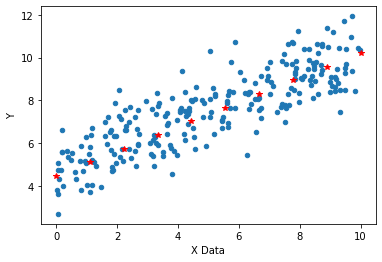

In [54]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,'r*')

# Tensorflow Classification Example - Part One

## Binary Classification Problem

In [1]:
# Import Diabetes Data set
import pandas as pd
diabetes = pd.read_csv(r'C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\02-TensorFlow-Basics\pima-indians-diabetes.csv')
diabetes.head() #1 - They HAVE DIABETES , 0 - THEY DONT HAVE DIABETES

Number_pregnant  Glucose_concentration  Blood_pressure   Triceps   Insulin  \
0                6               0.743719        0.590164  0.353535  0.000000   
1                1               0.427136        0.540984  0.292929  0.000000   
2                8               0.919598        0.524590  0.000000  0.000000   
3                1               0.447236        0.540984  0.232323  0.111111   
4                0               0.688442        0.327869  0.353535  0.198582   

        BMI  Pedigree  Age  Class Group  
0  0.500745  0.234415   50      1     B  
1  0.396423  0.116567   31      0     C  
2  0.347243  0.253629   32      1     B  
3  0.418778  0.038002   21      0     B  
4  0.642325  0.943638   33      1     C

In [2]:
# Clean or Normalize Dataset
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [3]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
diabetes[cols_to_norm].head()

Number_pregnant  Glucose_concentration  Blood_pressure   Triceps   Insulin  \
0                6               0.743719        0.590164  0.353535  0.000000   
1                1               0.427136        0.540984  0.292929  0.000000   
2                8               0.919598        0.524590  0.000000  0.000000   
3                1               0.447236        0.540984  0.232323  0.111111   
4                0               0.688442        0.327869  0.353535  0.198582   

        BMI  Pedigree  
0  0.500745  0.234415  
1  0.396423  0.116567  
2  0.347243  0.253629  
3  0.418778  0.038002  
4  0.642325  0.943638

In [7]:
#Normalizing all above columns
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x : (x - x.min()) / (x.max() - x.min()))
diabetes.head()

Number_pregnant  Glucose_concentration  Blood_pressure   Triceps   Insulin  \
0         0.352941               0.743719        0.590164  0.353535  0.000000   
1         0.058824               0.427136        0.540984  0.292929  0.000000   
2         0.470588               0.919598        0.524590  0.000000  0.000000   
3         0.058824               0.447236        0.540984  0.232323  0.111111   
4         0.000000               0.688442        0.327869  0.353535  0.198582   

        BMI  Pedigree  Age  Class Group  
0  0.500745  0.234415   50      1     B  
1  0.396423  0.116567   31      0     C  
2  0.347243  0.253629   32      1     B  
3  0.418778  0.038002   21      0     B  
4  0.642325  0.943638   33      1     C

### Binary Classification - Tensorflow

In [8]:
import tensorflow as tf

In [9]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [10]:
# Step 1 - Create Feature columns list

# Numeric Features
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

# Categroical Features

## Method 1 - Identify no of groups - Usefull when categories are less
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

## Method 2 - Usefull when there are more categories - Eg - Countries in World
# hash_bucket_size - Max no of categroies you will have in that column
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

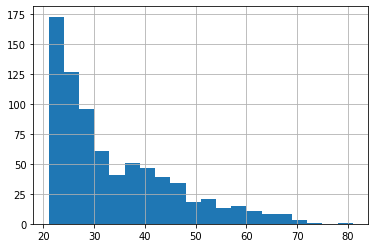

In [11]:
# Converting Continous Column to Categorical Column
# We have not Normalized 'Age' because we will convert it into categorical column

import matplotlib.pyplot as plt
%matplotlib inline

diabetes['Age'].hist(bins=20);

In [12]:
#We can create buckets for Decades
#In this you need to pass continous Feature which you created in step1 - age

#Converting Continous Numeric to Categorical Column
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [13]:
age_bucket

BucketizedColumn(source_column=NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80))

In [14]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

In [15]:
# Train Test Split

X_data = diabetes.drop('Class',axis=1)
X_data.head()

Number_pregnant  Glucose_concentration  Blood_pressure   Triceps   Insulin  \
0         0.352941               0.743719        0.590164  0.353535  0.000000   
1         0.058824               0.427136        0.540984  0.292929  0.000000   
2         0.470588               0.919598        0.524590  0.000000  0.000000   
3         0.058824               0.447236        0.540984  0.232323  0.111111   
4         0.000000               0.688442        0.327869  0.353535  0.198582   

        BMI  Pedigree  Age Group  
0  0.500745  0.234415   50     B  
1  0.396423  0.116567   31     C  
2  0.347243  0.253629   32     B  
3  0.418778  0.038002   21     B  
4  0.642325  0.943638   33     C

In [16]:
labels = diabetes['Class']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_data,labels,test_size=0.3,random_state=101)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 9)
(231, 9)
(537,)
(231,)


In [20]:
# Step 2 - Create Data Input Function - It acts like your Feed Dictionary,Batch Size
#We will pass same feature column name that we wrote in step 1

input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [21]:
# Step 3 - Model Creation

model = tf.estimator.LinearClassifier(feature_columns = feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\LUCKY_~1\\AppData\\Local\\Temp\\tmp0d73xtkj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000025EB1B5D7F0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [22]:
# Step 4 - Model Training

model.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\LUCKY_~1\A

In [23]:
# Step 5 - Evaluate Model Trained

eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,
                                                      batch_size=10,
                                                      num_epochs=1,
                                                      shuffle=False) #To make sure we evaluate in same order - shuffle

In [24]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-20T11:21:57Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\LUCKY_~1\AppData\Local\Temp\tmp0d73xtkj\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-08-20-11:21:59
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.7998766, auc_precision_recall = 0.64915895, average_loss = 0.5261694, global_step = 1000, label/mean = 0.35064936, loss = 5.0643806, precision = 0.6363636, prediction/mean = 0.38154146, recall = 0.60493827
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\LUCKY_~1\AppData\Local\Temp\tmp0d73xtkj\model.ckpt-1000


In [25]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.7998766,
 'auc_precision_recall': 0.64915895,
 'average_loss': 0.5261694,
 'label/mean': 0.35064936,
 'loss': 5.0643806,
 'precision': 0.6363636,
 'prediction/mean': 0.38154146,
 'recall': 0.60493827,
 'global_step': 1000}

In [26]:
## Testing on New Data

## We are testing on our test set , you can pass your own 
## We will not pass y , we will be predicting 
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

predictions = model.predict(pred_input_func)

In [27]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\LUCKY_~1\AppData\Local\Temp\tmp0d73xtkj\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [28]:
my_pred

[{'logits': array([0.17799228], dtype=float32),
  'logistic': array([0.54438096], dtype=float32),
  'probabilities': array([0.45561904, 0.54438096], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.6846631], dtype=float32),
  'logistic': array([0.66477865], dtype=float32),
  'probabilities': array([0.33522132, 0.66477865], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.36630732], dtype=float32),
  'logistic': array([0.4094336], dtype=float32),
  'probabilities': array([0.5905664 , 0.40943357], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},

-------

# Dense Neural Network Classifier 

In [29]:
# Hidden_units - How many neurons you want and how many layers
#We want 3 layers with 10 neurons each
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\LUCKY_~1\\AppData\\Local\\Temp\\tmp27dms14z', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000025ECE159278>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [30]:
# You will get error if you use previous input_func
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.


ValueError: Items of feature_columns must be a <class 'tensorflow.python.feature_column.feature_column_v2.DenseColumn'>. You can wrap a categorical column with an embedding_column or indicator_column. Given: VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [31]:
# It gives error at Categorical Columns that we created

embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [32]:
# Reset Feat Columns
## Replace assigned_group with embedded_group_col
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,embedded_group_col,age_bucket]

In [33]:
#Step 2 - Create input Function
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [34]:
# Step 3 - Create Model
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\LUCKY_~1\\AppData\\Local\\Temp\\tmpyjuq8kto', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000025EB42264E0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [35]:
# Step 4 - Train Model
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\LUCKY_~1\AppData\Local\Temp\tmpyjuq8kto\model.ckpt.
INFO:tensorflow:loss = 7.425701, step = 0
INFO:tensorflow:global_step/sec: 26.4979
INFO:tensorflow:loss = 5.748277, step = 100 (3.778 sec)
INFO:tensorflow:global_step/sec: 44.6717
INFO:tensorflow:loss = 4.7091885, step = 200 (2.238 sec)
INFO:tensorflow:global_step/sec: 67.3143
INFO:tensorflow:loss = 4.3222723, step = 300 (1.484 sec)
INFO:tensorflow:global_step/sec: 79.704
INFO:tensorflow:loss = 6.980344, step =

In [36]:
# Step 5 - Eval Model

eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-20T11:54:15Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\LUCKY_~1\AppData\Local\Temp\tmpyjuq8kto\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-08-20-11:54:17
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7619048, accuracy_baseline = 0.64935064, auc = 0.81189305, auc_precision_recall = 0.652876, average_loss = 0.5040666, global_step = 1000, label/mean = 0.35064936, loss = 4.8516407, precision = 0.7096774, prediction/mean = 0.32602334, recall = 0.54320985
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\LUCKY_~1\AppData\Local\Temp\tmpyjuq8kto\model.ckpt-1000


{'accuracy': 0.7619048,
 'accuracy_baseline': 0.64935064,
 'auc': 0.81189305,
 'auc_precision_recall': 0.652876,
 'average_loss': 0.5040666,
 'label/mean': 0.35064936,
 'loss': 4.8516407,
 'precision': 0.7096774,
 'prediction/mean': 0.32602334,
 'recall': 0.54320985,
 'global_step': 1000}

-----

## Tensorflow Regression Excercise

California Housing Data

This data set contains information about all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. 

The task is to aproximate the median house value of each block from the values of the rest of the variables. 

 It has been obtained from the LIACC repository. The original page where the data set can be found is: http://www.liaad.up.pt/~ltorgo/Regression/DataSets.html.
 

The Features:
 
* housingMedianAge: continuous. 
* totalRooms: continuous. 
* totalBedrooms: continuous. 
* population: continuous. 
* households: continuous. 
* medianIncome: continuous. 
* medianHouseValue: continuous. 

In [83]:
# Import Dataset
import pandas as pd

housing = pd.read_csv(r'C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\02-TensorFlow-Basics\cal_housing_clean.csv')
housing.head()

housingMedianAge  totalRooms  totalBedrooms  population  households  \
0              41.0       880.0          129.0       322.0       126.0   
1              21.0      7099.0         1106.0      2401.0      1138.0   
2              52.0      1467.0          190.0       496.0       177.0   
3              52.0      1274.0          235.0       558.0       219.0   
4              52.0      1627.0          280.0       565.0       259.0   

   medianIncome  medianHouseValue  
0        8.3252          452600.0  
1        8.3014          358500.0  
2        7.2574          352100.0  
3        5.6431          341300.0  
4        3.8462          342200.0

In [84]:
#Describe
housing.describe().transpose()

count           mean            std         min  \
housingMedianAge  20640.0      28.639486      12.585558      1.0000   
totalRooms        20640.0    2635.763081    2181.615252      2.0000   
totalBedrooms     20640.0     537.898014     421.247906      1.0000   
population        20640.0    1425.476744    1132.462122      3.0000   
households        20640.0     499.539680     382.329753      1.0000   
medianIncome      20640.0       3.870671       1.899822      0.4999   
medianHouseValue  20640.0  206855.816909  115395.615874  14999.0000   

                          25%          50%           75%          max  
housingMedianAge      18.0000      29.0000      37.00000      52.0000  
totalRooms          1447.7500    2127.0000    3148.00000   39320.0000  
totalBedrooms        295.0000     435.0000     647.00000    6445.0000  
population           787.0000    1166.0000    1725.00000   35682.0000  
households           280.0000     409.0000     605.00000    6082.0000  
medianIncome           2.5634       3.5348       4.74325      15.0001  
medianHouseValue  119600.0000  179700.0000  264725.00000  500001.0000

In [85]:
y_val = housing['medianHouseValue']
y_val.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: medianHouseValue, dtype: float64

In [86]:
x_data = housing.drop('medianHouseValue',axis=1)
x_data.head()

housingMedianAge  totalRooms  totalBedrooms  population  households  \
0              41.0       880.0          129.0       322.0       126.0   
1              21.0      7099.0         1106.0      2401.0      1138.0   
2              52.0      1467.0          190.0       496.0       177.0   
3              52.0      1274.0          235.0       558.0       219.0   
4              52.0      1627.0          280.0       565.0       259.0   

   medianIncome  
0        8.3252  
1        8.3014  
2        7.2574  
3        5.6431  
4        3.8462

In [87]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_val, test_size=0.30, random_state=101)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14448, 6)
(6192, 6)
(14448,)
(6192,)


### Scale the Feature Data

** Use sklearn preprocessing to create a MinMaxScaler for the feature data. Fit this scaler only to the training data. Then use it to transform X_test and X_train. Then use the scaled X_test and X_train along with pd.Dataframe to re-create two dataframes of scaled data.**

In [88]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [89]:
X_train = pd.DataFrame(data = scaler.transform(X_train),
                      columns = X_train.columns,
                      index = X_train.index)
X_train.head()

housingMedianAge  totalRooms  totalBedrooms  population  households  \
6761          0.352941    0.069688       0.117163    0.048769    0.115442   
3010          0.607843    0.011242       0.015673    0.008367    0.014142   
7812          0.666667    0.025230       0.031347    0.020971    0.030258   
8480          0.666667    0.032530       0.033830    0.024752    0.030094   
1051          0.294118    0.031919       0.035692    0.019466    0.034863   

      medianIncome  
6761      0.142508  
3010      0.045027  
7812      0.212866  
8480      0.298651  
1051      0.272631

In [90]:
X_test = pd.DataFrame(data = scaler.transform(X_test),
                      columns = X_test.columns,
                      index = X_test.index)
X_test.head()

housingMedianAge  totalRooms  totalBedrooms  population  households  \
16086          0.686275    0.046264       0.045158    0.025873    0.048841   
8816           0.705882    0.027417       0.020795    0.012709    0.023187   
7175           0.901961    0.032326       0.040813    0.041662    0.042592   
16714          0.313725    0.043212       0.046089    0.032840    0.048018   
14491          0.411765    0.088433       0.069367    0.043728    0.072192   

       medianIncome  
16086      0.353133  
8816       0.770182  
7175       0.133626  
16714      0.263576  
14491      0.660046

In [91]:
y_test.head()

16086    406200.0
8816     500001.0
7175     122900.0
16714    209100.0
14491    500001.0
Name: medianHouseValue, dtype: float64

In [92]:
housing.columns

Index(['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population',
       'households', 'medianIncome', 'medianHouseValue'],
      dtype='object')

In [93]:
import tensorflow as tf

In [94]:
# Step 1  - Create List of Feature Columns

## Numeric 
age = tf.feature_column.numeric_column('housingMedianAge')
rooms = tf.feature_column.numeric_column('totalRooms')
bedrooms = tf.feature_column.numeric_column('totalBedrooms')
pop = tf.feature_column.numeric_column('population')
households = tf.feature_column.numeric_column('households')
income = tf.feature_column.numeric_column('medianIncome')

feat_cols = [ age,rooms,bedrooms,pop,households,income]

In [95]:
y_train.head()

6761    197500.0
3010    150000.0
7812    178000.0
8480    152800.0
1051    144300.0
Name: medianHouseValue, dtype: float64

In [96]:
# Step 2 - Create Input Functions - Training 
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train ,batch_size=10,num_epochs=1000,
                                            shuffle=True)

In [97]:
# Step 3 - Create Estimator Model

model = tf.estimator.DNNRegressor(hidden_units=[6,6,6],feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\LUCKY_~1\\AppData\\Local\\Temp\\tmpu3v2b8rd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000025F9B51FB38>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [98]:
# Step 4 - Train Model with input_func created in step 2

model.train(input_fn=input_func,steps=20000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\LUCKY_~1\AppData\Local\Temp\tmpu3v2b8rd\model.ckpt.
INFO:tensorflow:loss = 359474720000.0, step = 0
INFO:tensorflow:global_step/sec: 57.7246
INFO:tensorflow:loss = 438669570000.0, step = 100 (1.731 sec)
INFO:tensorflow:global_step/sec: 109.343
INFO:tensorflow:loss = 546009970000.0, step = 200 (0.915 sec)
INFO:tensorflow:global_step/sec: 125.335
INFO:tensorflow:loss = 852174900000.0, step = 300 (0.797 sec)
INFO:tensorflow:global_step/sec: 116.05
INFO:tensorflow:loss = 719156800000.0, step = 400 (0.863 sec)
INFO:tensorflow:global_step/sec: 144.895
INFO:tensorflow:loss = 741133250000.0, step = 500 (0.688 sec)
INFO:tensorflow:global_step/sec: 147.669
INFO:tensorflow:loss = 704583760000.0, step = 600 (0.

INFO:tensorflow:global_step/sec: 116.455
INFO:tensorflow:loss = 191614570000.0, step = 7400 (0.862 sec)
INFO:tensorflow:global_step/sec: 85.6255
INFO:tensorflow:loss = 173913540000.0, step = 7500 (1.167 sec)
INFO:tensorflow:global_step/sec: 105.434
INFO:tensorflow:loss = 194989590000.0, step = 7600 (0.947 sec)
INFO:tensorflow:global_step/sec: 111.781
INFO:tensorflow:loss = 60459020000.0, step = 7700 (0.895 sec)
INFO:tensorflow:global_step/sec: 114.723
INFO:tensorflow:loss = 104390980000.0, step = 7800 (0.874 sec)
INFO:tensorflow:global_step/sec: 113.041
INFO:tensorflow:loss = 63079970000.0, step = 7900 (0.883 sec)
INFO:tensorflow:global_step/sec: 142.425
INFO:tensorflow:loss = 178233640000.0, step = 8000 (0.702 sec)
INFO:tensorflow:global_step/sec: 115.649
INFO:tensorflow:loss = 119045775000.0, step = 8100 (0.867 sec)
INFO:tensorflow:global_step/sec: 111.532
INFO:tensorflow:loss = 41686720000.0, step = 8200 (0.896 sec)
INFO:tensorflow:global_step/sec: 165.732
INFO:tensorflow:loss = 115

INFO:tensorflow:loss = 96519815000.0, step = 14700 (0.584 sec)
INFO:tensorflow:global_step/sec: 108.515
INFO:tensorflow:loss = 184110970000.0, step = 14800 (0.921 sec)
INFO:tensorflow:global_step/sec: 125.649
INFO:tensorflow:loss = 170490120000.0, step = 14900 (0.796 sec)
INFO:tensorflow:global_step/sec: 99.6696
INFO:tensorflow:loss = 135387510000.0, step = 15000 (1.004 sec)
INFO:tensorflow:global_step/sec: 119.651
INFO:tensorflow:loss = 71078720000.0, step = 15100 (0.835 sec)
INFO:tensorflow:global_step/sec: 94.6814
INFO:tensorflow:loss = 112967385000.0, step = 15200 (1.058 sec)
INFO:tensorflow:global_step/sec: 125.964
INFO:tensorflow:loss = 129326610000.0, step = 15300 (0.793 sec)
INFO:tensorflow:global_step/sec: 104.664
INFO:tensorflow:loss = 83986830000.0, step = 15400 (0.954 sec)
INFO:tensorflow:global_step/sec: 131.412
INFO:tensorflow:loss = 55383660000.0, step = 15500 (0.761 sec)
INFO:tensorflow:global_step/sec: 119.937
INFO:tensorflow:loss = 176951260000.0, step = 15600 (0.835 

In [100]:
# Step 5 - Evaluate

eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

evalmetrics = model.evaluate(input_fn=eval_input_func)
evalmetrics

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-20T16:11:45Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\LUCKY_~1\AppData\Local\Temp\tmpu3v2b8rd\model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-08-20-16:11:51
INFO:tensorflow:Saving dict for global step 20000: average_loss = 10137248000.0, global_step = 20000, label/mean = 207662.89, loss = 101241676000.0, prediction/mean = 211164.14
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20000: C:\Users\LUCKY_~1\AppData\Local\Temp\tmpu3v2b8rd\model.ckpt-20000


{'average_loss': 10137248000.0,
 'label/mean': 207662.89,
 'loss': 101241676000.0,
 'prediction/mean': 211164.14,
 'global_step': 20000}

In [101]:
# Step 6 - Prediction

predict_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

pred_gen = model.predict(predict_input_func)

predictions = list(pred_gen)
predictions

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\LUCKY_~1\AppData\Local\Temp\tmpu3v2b8rd\model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([235784.7], dtype=float32)},
 {'predictions': array([301246.9], dtype=float32)},
 {'predictions': array([217810.94], dtype=float32)},
 {'predictions': array([185683.25], dtype=float32)},
 {'predictions': array([270909.44], dtype=float32)},
 {'predictions': array([200761.83], dtype=float32)},
 {'predictions': array([228910.53], dtype=float32)},
 {'predictions': array([207740.39], dtype=float32)},
 {'predictions': array([216894.19], dtype=float32)},
 {'predictions': array([187771.64], dtype=float32)},
 {'predictions': array([206882.7], dtype=float32)},
 {'predictions': array([225797.89], dtype=float32)},
 {'predictions': array([194212.55], dtype=float32)},
 {'predictions': array([179191.], dtype=float32)},
 {'predictions': array([261961.08], dtype=float32)},
 {'predictions': array([177523.16], dtype=float32)},
 {'predictions': array([203417.83], dtype=float32)},
 {'predictions': array([187795.62], dtype=float32)},
 {'predictions': array([181571.83], dtype=float32)}

### RMSE

In [102]:
final_preds = []

for pred in predictions:
    final_preds.append(pred['predictions'])
    
from sklearn.metrics import mean_squared_error

In [103]:
mean_squared_error(y_test,final_preds) ** 0.5

100683.9386679309

In [104]:
## Our Mean Squared error should be mean value of medianHouseValue Column - Which is 20000 from descibe()

-----

## Tensorflow Classification Exercise

We'll be working with some California Census Data, we'll be trying to use various features of an individual to predict what class of income they belogn in (>50k or <=50k). 

Here is some information about the data:

<table>
<thead>
<tr>
<th>Column Name</th>
<th>Type</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>age</td>
<td>Continuous</td>
<td>The age of the individual</td>
</tr>
<tr>
<td>workclass</td>
<td>Categorical</td>
<td>The type of employer the  individual has (government,  military, private, etc.).</td>
</tr>
<tr>
<td>fnlwgt</td>
<td>Continuous</td>
<td>The number of people the census  takers believe that observation  represents (sample weight). This  variable will not be used.</td>
</tr>
<tr>
<td>education</td>
<td>Categorical</td>
<td>The highest level of education  achieved for that individual.</td>
</tr>
<tr>
<td>education_num</td>
<td>Continuous</td>
<td>The highest level of education in  numerical form.</td>
</tr>
<tr>
<td>marital_status</td>
<td>Categorical</td>
<td>Marital status of the individual.</td>
</tr>
<tr>
<td>occupation</td>
<td>Categorical</td>
<td>The occupation of the individual.</td>
</tr>
<tr>
<td>relationship</td>
<td>Categorical</td>
<td>Wife, Own-child, Husband,  Not-in-family, Other-relative,  Unmarried.</td>
</tr>
<tr>
<td>race</td>
<td>Categorical</td>
<td>White, Asian-Pac-Islander,  Amer-Indian-Eskimo, Other, Black.</td>
</tr>
<tr>
<td>gender</td>
<td>Categorical</td>
<td>Female, Male.</td>
</tr>
<tr>
<td>capital_gain</td>
<td>Continuous</td>
<td>Capital gains recorded.</td>
</tr>
<tr>
<td>capital_loss</td>
<td>Continuous</td>
<td>Capital Losses recorded.</td>
</tr>
<tr>
<td>hours_per_week</td>
<td>Continuous</td>
<td>Hours worked per week.</td>
</tr>
<tr>
<td>native_country</td>
<td>Categorical</td>
<td>Country of origin of the  individual.</td>
</tr>
<tr>
<td>income</td>
<td>Categorical</td>
<td>"&gt;50K" or "&lt;=50K", meaning  whether the person makes more  than \$50,000 annually.</td>
</tr>
</tbody>
</table>

In [111]:
# Import Dataset

import pandas as pd
census = pd.read_csv(r'C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\02-TensorFlow-Basics\census_data.csv')
census.head()

age          workclass   education  education_num       marital_status  \
0   39          State-gov   Bachelors             13        Never-married   
1   50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2   38            Private     HS-grad              9             Divorced   
3   53            Private        11th              7   Married-civ-spouse   
4   28            Private   Bachelors             13   Married-civ-spouse   

           occupation    relationship    race   gender  capital_gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   capital_loss  hours_per_week  native_country income_bracket  
0             0              40   United-States          <=50K  
1             0              13   United-States          <=50K  
2             0              40   United-States          <=50K  
3             0              40   United-States          <=50K  
4             0              40            Cuba          <=50K

In [112]:
#Convert label column to 0 and 1 instead of strings

census['income_bracket'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [113]:
def label_fix(label):
    if label == ' <=50K':
        return 0
    else:
        return 1

census['income_bracket'] = census['income_bracket'].apply(label_fix)
census.head()

age          workclass   education  education_num       marital_status  \
0   39          State-gov   Bachelors             13        Never-married   
1   50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2   38            Private     HS-grad              9             Divorced   
3   53            Private        11th              7   Married-civ-spouse   
4   28            Private   Bachelors             13   Married-civ-spouse   

           occupation    relationship    race   gender  capital_gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   capital_loss  hours_per_week  native_country  income_bracket  
0             0              40   United-States               0  
1             0              13   United-States               0  
2             0              40   United-States               0  
3             0              40   United-States               0  
4             0              40            Cuba               0

In [114]:
# Train Test Split

from sklearn.model_selection import train_test_split

x_data = census.drop('income_bracket',axis=1)
y_labels = census['income_bracket']
X_train, X_test, y_train, y_test = train_test_split(x_data, y_labels, test_size=0.30, random_state=101)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22792, 13)
(9769, 13)
(22792,)
(9769,)


In [115]:
census.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income_bracket'],
      dtype='object')

In [116]:
import tensorflow as tf

In [117]:
# Step 1 - List of Feature Columns

## Categorical

gender = tf.feature_column.categorical_column_with_vocabulary_list("gender", ["Female", "Male"])
occupation = tf.feature_column.categorical_column_with_hash_bucket("occupation", hash_bucket_size=1000)
marital_status = tf.feature_column.categorical_column_with_hash_bucket("marital_status", hash_bucket_size=1000)
relationship = tf.feature_column.categorical_column_with_hash_bucket("relationship", hash_bucket_size=1000)
education = tf.feature_column.categorical_column_with_hash_bucket("education", hash_bucket_size=1000)
workclass = tf.feature_column.categorical_column_with_hash_bucket("workclass", hash_bucket_size=1000)
native_country = tf.feature_column.categorical_column_with_hash_bucket("native_country", hash_bucket_size=1000)

## Numerical

age = tf.feature_column.numeric_column("age")
education_num = tf.feature_column.numeric_column("education_num")
capital_gain = tf.feature_column.numeric_column("capital_gain")
capital_loss = tf.feature_column.numeric_column("capital_loss")
hours_per_week = tf.feature_column.numeric_column("hours_per_week")

feat_cols = [gender,occupation,marital_status,relationship,education,workclass,native_country,
            age,education_num,capital_gain,capital_loss,hours_per_week]

**Create a LinearClassifier.(If you want to use a DNNClassifier, keep in mind you'll need to create embedded columns out of the cateogrical feature that use strings, check out the previous lecture on this for more info.)**

In [118]:
# Step 2 - Input Function

#We are creating Linear Classifier . No need of epochs .
#If we used Neural Network then epochs are used

input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=100,num_epochs=None,shuffle=True)

In [119]:
# Step 3 - Create Model

model = tf.estimator.LinearClassifier(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\LUCKY_~1\\AppData\\Local\\Temp\\tmp5mfeelf1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000025F9A873B00>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [120]:
# Step 4 - Train Model

model.train(input_fn=input_func,steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\LUCKY_~1\AppData\Local\Temp\tmp5mfeelf1\model.ckpt.
INFO:tensorflow:loss = 69.31472, step = 0
INFO:tensorflow:global_step/sec: 16.6751
INFO:tensorflow:loss = 589.50446, step = 100 (5.993 sec)
INFO:tensorflow:global_step/sec: 38.7645
INFO:tensorflow:loss = 231.88809, step = 200 (2.582 sec)
INFO:tensorflow:global_step/sec: 40.3173
INFO:tensorflow:loss = 300.99094, step = 300 (2.479 sec)
INFO:tensorflow:global_step/sec: 39.5892
INFO:tensorflow:loss = 212.03342, step = 400 (2.526 sec)
INFO:tensorflow:global_step/sec: 40.2857
INFO:tensorflow:loss = 186.92662, step = 500 (2.482 sec)
INFO:tensorflow:global_step/sec: 43.8948
INFO:tensorflow:loss = 122.53108, step = 600 (2.278 sec)
INFO:tensorflow:global_ste

INFO:tensorflow:loss = 51.798702, step = 8000 (2.452 sec)
INFO:tensorflow:global_step/sec: 45.1454
INFO:tensorflow:loss = 30.1587, step = 8100 (2.215 sec)
INFO:tensorflow:global_step/sec: 42.1292
INFO:tensorflow:loss = 49.626106, step = 8200 (2.375 sec)
INFO:tensorflow:global_step/sec: 34.4918
INFO:tensorflow:loss = 36.65219, step = 8300 (2.898 sec)
INFO:tensorflow:global_step/sec: 43.1444
INFO:tensorflow:loss = 32.575287, step = 8400 (2.318 sec)
INFO:tensorflow:global_step/sec: 45.2163
INFO:tensorflow:loss = 23.758951, step = 8500 (2.212 sec)
INFO:tensorflow:global_step/sec: 47.1403
INFO:tensorflow:loss = 84.72438, step = 8600 (2.121 sec)
INFO:tensorflow:global_step/sec: 43.7086
INFO:tensorflow:loss = 32.607918, step = 8700 (2.288 sec)
INFO:tensorflow:global_step/sec: 46.8321
INFO:tensorflow:loss = 151.02206, step = 8800 (2.134 sec)
INFO:tensorflow:global_step/sec: 46.8759
INFO:tensorflow:loss = 39.59335, step = 8900 (2.133 sec)
INFO:tensorflow:global_step/sec: 40.8256
INFO:tensorflow

In [121]:
# Step 5 - Evaluate 

eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

evalmetrics = model.evaluate(input_fn=eval_input_func)
evalmetrics

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-20T16:56:00Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\LUCKY_~1\AppData\Local\Temp\tmp5mfeelf1\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-08-20-16:56:27
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.8379568, accuracy_baseline = 0.7611833, auc = 0.8863338, auc_precision_recall = 0.6880697, average_loss = 0.536477, global_step = 10000, label/mean = 0.23881666, loss = 5.364221, precision = 0.67490673, prediction/mean = 0.25514737, recall = 0.62023145
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: C:\Users\LUCKY_~1\AppData\Local\Temp\tmp5mfeelf1\model.ckpt-10000


{'accuracy': 0.8379568,
 'accuracy_baseline': 0.7611833,
 'auc': 0.8863338,
 'auc_precision_recall': 0.6880697,
 'average_loss': 0.536477,
 'label/mean': 0.23881666,
 'loss': 5.364221,
 'precision': 0.67490673,
 'prediction/mean': 0.25514737,
 'recall': 0.62023145,
 'global_step': 10000}

In [122]:
# Step 6 - Prediction

pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)
predictions = list(model.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\LUCKY_~1\AppData\Local\Temp\tmp5mfeelf1\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [123]:
predictions

[{'logits': array([-0.87947553], dtype=float32),
  'logistic': array([0.2932865], dtype=float32),
  'probabilities': array([0.70671356, 0.29328647], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-8.976079], dtype=float32),
  'logistic': array([0.00012636], dtype=float32),
  'probabilities': array([9.9987364e-01, 1.2638152e-04], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.4255914], dtype=float32),
  'logistic': array([0.39517957], dtype=float32),
  'probabilities': array([0.60482043, 0.39517954], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=obj

In [124]:
predictions[0]

{'logits': array([-0.87947553], dtype=float32),
 'logistic': array([0.2932865], dtype=float32),
 'probabilities': array([0.70671356, 0.29328647], dtype=float32),
 'class_ids': array([0], dtype=int64),
 'classes': array([b'0'], dtype=object),
 'all_class_ids': array([0, 1]),
 'all_classes': array([b'0', b'1'], dtype=object)}

In [125]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['class_ids'][0])

In [126]:
final_preds[:10]

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [127]:
from sklearn.metrics import classification_report

In [128]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      7436
           1       0.67      0.62      0.65      2333

    accuracy                           0.84      9769
   macro avg       0.78      0.76      0.77      9769
weighted avg       0.83      0.84      0.84      9769



----

## Saving and Restoring Models



In [130]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(101)
tf.set_random_seed(101)

## Full Network Example

Let's work on a regression example, we are trying to solve a very simple equation:

y = mx + b

y will be the y_labels and x is the x_data. We are trying to figure out the slope and the intercept for the line that best fits our data!

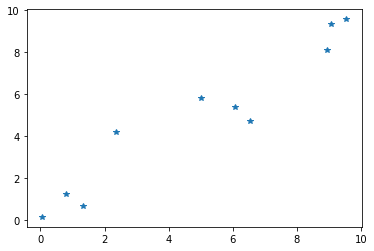

In [131]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

plt.plot(x_data,y_label,'*');

In [132]:
m = tf.Variable(0.39)
b = tf.Variable(0.2)

# Cost Function
error = tf.reduce_mean(y_label - (m*x_data+b))

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

init = tf.global_variables_initializer()


## Saving Model

In [133]:
saver = tf.train.Saver()

# Create a session and run
with tf.Session() as sess:
    
    sess.run(init)
    
    epochs = 100
    
    for i in range(epochs):
        
        sess.run(train)

    # Fetch Back Results
    final_slope , final_intercept = sess.run([m,b])
    
    # ONCE YOU ARE DONE
    # GO AHEAD AND SAVE IT!
    # Make sure to provide a directory for it to make or go to. May get errors otherwise
    #saver.save(sess,'models/my_first_model.ckpt')
    saver.save(sess,r'C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\02-TensorFlow-Basics\new_models_lucky\my_second_model.ckpt')

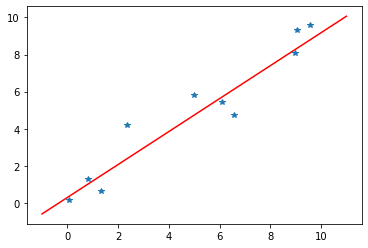

In [134]:
# Evaluate Results

x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')

## Loading Model


In [135]:
with tf.Session() as sess:
    
    # Restore the model
    saver.restore(sess,r'C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\02-TensorFlow-Basics\new_models_lucky\my_second_model.ckpt')
    

    # Fetch Back Results
    restored_slope , restored_intercept = sess.run([m,b])

INFO:tensorflow:Restoring parameters from C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\02-TensorFlow-Basics\new_models_lucky\my_second_model.ckpt


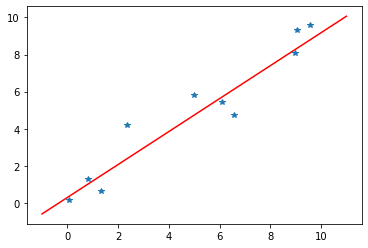

In [136]:
x_test = np.linspace(-1,11,10)
y_pred_plot = restored_slope*x_test + restored_intercept

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')

# Completed